In [2]:
!pip install matplotlib
!pip install seaborn
!pip install xlrd
!pip install bs4
# !pip install tmdbv3api
!pip install nltk
!pip install gensim

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
import ast
import pickle
style.use('seaborn-poster')
style.use('ggplot')


from bs4 import BeautifulSoup
import requests
import os

# from tmdbv3api import TMDb
# from tmdbv3api import Movie
# tmdb = TMDb()
# tmdb.api_key = '14dec12dedde4ad68a8707bdf54d04ab'

import pandas as pd
import numpy as np
import pickle
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
import ast
from sklearn.preprocessing import MultiLabelBinarizer
from string import punctuation
from gensim.models import KeyedVectors


from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score


from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model, load_model
from keras.layers import Embedding, LSTM, Dropout, Dense, Input, Bidirectional, Flatten, Conv2D, MaxPooling2D, concatenate, Conv1D, MaxPooling1D
import keras.backend as K
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !ls -ltr /content/drive/MyDrive/New_Approach_7_Movie_Content_Sagemaker/MovieContent

no need to run the below

In [3]:
train = pd.read_csv("/content/drive/MyDrive/New_Approach_7_Movie_Content_Sagemaker/MovieContent/train_data_224X224_VGG19.csv")
test = pd.read_csv("/content/drive/MyDrive/New_Approach_7_Movie_Content_Sagemaker/MovieContent/test_data_224X224_VGG19.csv")
val = pd.read_csv("/content/drive/MyDrive/New_Approach_7_Movie_Content_Sagemaker/MovieContent/val_data_224X224_VGG19.csv")

dataset = pd.concat([train, test,val])

In [ ]:
train

Unnamed: 0  ...                                       poster_paths
0              0  ...  /content/drive/MyDrive/New_Approach_7_Movie_Co...
1              1  ...  /content/drive/MyDrive/New_Approach_7_Movie_Co...
2              2  ...  /content/drive/MyDrive/New_Approach_7_Movie_Co...
3              3  ...  /content/drive/MyDrive/New_Approach_7_Movie_Co...
4              4  ...  /content/drive/MyDrive/New_Approach_7_Movie_Co...
...          ...  ...                                                ...
3352        3352  ...  /content/drive/MyDrive/New_Approach_7_Movie_Co...
3353        3353  ...  /content/drive/MyDrive/New_Approach_7_Movie_Co...
3354        3354  ...  /content/drive/MyDrive/New_Approach_7_Movie_Co...
3355        3355  ...  /content/drive/MyDrive/New_Approach_7_Movie_Co...
3356        3356  ...  /content/drive/MyDrive/New_Approach_7_Movie_Co...

[3357 rows x 15 columns]

In [4]:
maxvote = train["vote_average"].max()
train_labels = train["vote_average"] / maxvote
test_labels = test["vote_average"] / maxvote
val_labels = val["vote_average"] / maxvote

In [ ]:
# import pickle
# with open('/content/drive/My Drive/MovieContent/train_labels','wb') as f: pickle.dump(train_labels, f)

In [ ]:
# import pickle
# with open('/content/drive/My Drive/MovieContent/test_labels','wb') as f: pickle.dump(test_labels, f)

In [ ]:
# import pickle
# with open('/content/drive/My Drive/MovieContent/val_labels','wb') as f: pickle.dump(val_labels, f)

In [ ]:
train_labels.count

<bound method Series.count of 0       0.61
1       0.74
2       0.75
3       0.44
4       0.56
        ... 
3352    0.65
3353    0.72
3354    0.82
3355    0.56
3356    0.65
Name: vote_average, Length: 3357, dtype: float64>

In [ ]:
test_labels.count

<bound method Series.count of 0      0.72
1      0.68
2      0.57
3      0.55
4      0.56
       ... 
927    0.70
928    0.55
929    0.65
930    0.64
931    0.63
Name: vote_average, Length: 932, dtype: float64>

In [5]:
val_labels.count

<bound method Series.count of 0      0.57
1      0.51
2      0.71
3      0.61
4      0.66
       ... 
369    0.32
370    0.64
371    0.70
372    0.65
373    0.60
Name: vote_average, Length: 374, dtype: float64>

In [6]:
from sklearn.preprocessing import MinMaxScaler
def prepare_categ_columns(train,test,val):
    continuous = ['keywords', 'production_companies','cast', 'crew']
    cs = MinMaxScaler()
    trainContinuous = cs.fit_transform(train[continuous])
    testContinuous  = cs.transform(test[continuous])
    valContinuous  =  cs.transform(val[continuous])
    ##print('test')
    train_categ = np.hstack([trainContinuous])
    test_categ  = np.hstack([testContinuous])
    val_categ   = np.hstack([valContinuous])
    return (train_categ, test_categ,val_categ) 

In [7]:
(X_categ_train, X_categ_test,X_categ_val) = prepare_categ_columns(train, test,val)

In [8]:
continuous = ['keywords', 'production_companies','cast', 'crew']
categ_featurenames = train.columns
print(type(categ_featurenames))
print(categ_featurenames)
print(continuous)
print(type(continuous))

<class 'pandas.core.indexes.base.Index'>
Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1',
       'original_title', 'overview', 'id', 'genres', 'genre_list',
       'vote_average', 'keywords', 'production_companies', 'cast', 'crew',
       'poster_paths'],
      dtype='object')
['keywords', 'production_companies', 'cast', 'crew']
<class 'list'>


In [9]:
print(X_categ_train.shape,    X_categ_test.shape,   X_categ_val.shape)
print(X_categ_train.shape[1], X_categ_test.shape[1],X_categ_val.shape[1])
print(X_categ_train.shape[0], X_categ_test.shape[0],X_categ_val.shape[0])

(3357, 4) (932, 4) (374, 4)
4 4 4
3357 932 374


In [10]:
X_categ_train

array([[0.44344419, 0.39606742, 0.41705564, 0.35527847],
       [0.67444301, 0.62366239, 0.83617377, 0.77625667],
       [0.53665802, 0.54909042, 0.78799852, 0.50576831],
       ...,
       [0.86846764, 0.84109149, 0.90885999, 0.96999297],
       [0.36982631, 0.65880819, 0.39662621, 0.42547823],
       [0.36591824, 0.61867978, 0.57716941, 0.66916211]])

In [ ]:
X_categ_test

array([[0.63132811, 0.74993312, 0.71043471, 0.89240389],
       [0.591153  , 0.55052836, 0.60747704, 0.70867228],
       [0.42404757, 0.41637685, 0.49599444, 0.45845924],
       ...,
       [0.4863244 , 0.54618111, 0.58049109, 0.77181152],
       [0.31174539, 0.42736758, 0.52921126, 0.55784956],
       [0.33696957, 0.47331461, 0.45420204, 0.48031228]])

In [ ]:
X_categ_val

array([[0.34581464, 0.38041734, 0.50011941, 0.42301085],
       [0.18188943, 0.31861958, 0.23494931, 0.33082555],
       [0.4710072 , 0.63743981, 0.59523241, 0.79072039],
       ...,
       [0.671595  , 0.70960407, 0.67089295, 0.64502165],
       [0.51309751, 0.48505217, 0.51870346, 0.5114844 ],
       [0.37892396, 0.22050562, 0.40698205, 0.39702273]])

In [11]:
stop = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

def clean_text(text):
  text = text.translate(str.maketrans('', '', punctuation))
  text = text.lower().strip()
  text = ' '.join([i if i not in stop and i.isalpha() else '' for i in text.lower().split()])
  text = ' '.join([lemmatizer.lemmatize(w) for w in word_tokenize(text)])
  text = re.sub(r"\s{2,}", " ", text)
  return text

train['overview'] = train['overview'].astype(str)
test['overview'] = test['overview'].astype(str)
val['overview'] = val['overview'].astype(str)

train['overview'] = train['overview'].apply(lambda text: clean_text(text))
test['overview'] = test['overview'].apply(lambda text: clean_text(text))
val['overview'] = val['overview'].apply(lambda text: clean_text(text))

In [12]:

dataset['overview'] = dataset['overview'].astype(str)
dataset['overview'] = dataset['overview'].apply(lambda text: clean_text(text))

In [ ]:
dataset['overview']

0       human depleted earth natural resource leading ...
1       order control ocean lord cutler beckett execut...
2       posthumous message previous lead agent james b...
3       bane mysterious terrorist former member league...
4       edgar rice burroughs attends funeral uncle joh...
                              ...                        
4659    two engineer aaron abe supplement dayjobs entr...
4660    breaking jail small mexican town ruthless crim...
4661    honeymoon period end quickly buzzy burn katie ...
4662    signed sealed delivered introduces dedicated q...
4663    ever since second grade first saw et extraterr...
Name: overview, Length: 4664, dtype: object

In [13]:
MAX_NB_WORDS = 50000
MAX_SEQUENCE_LENGTH = dataset['overview'].map(len).max()
EMBEDDING_DIM = 300
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, lower=True)
tokenizer.fit_on_texts(dataset['overview'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
print('Max len:', MAX_SEQUENCE_LENGTH)

Found 57060 unique tokens.
Max len: 8190


In [14]:
def get_embedding_matrix(typeToLoad):
  if typeToLoad == "glove":
    EMBEDDING_FILE="/content/drive/MyDrive/New_Approach_7_Movie_Content_Sagemaker/MovieContent/glove.6B.100d.txt"
    embed_size = 100
  elif typeToLoad == "word2vec":
    word2vecDict = KeyedVectors.load_word2vec_format("/content/drive/MyDrive/New_Approach_7_Movie_Content_Sagemaker/MovieContent/glove.6B.100d.txt", binary=True)
    embed_size = 300
  elif typeToLoad == "fasttext":
    EMBEDDING_FILE="../wiki-news-300d-1M.vec"
    embed_size = 100

  if typeToLoad == "glove"or typeToLoad == "fasttext":
    embeddings_index = dict()
    f = open('/content/drive/MyDrive/New_Approach_7_Movie_Content_Sagemaker/MovieContent/glove.6B.100d.txt', encoding="utf8")
    for line in f:
      values = line.split()
      word = values[0]
      coefs = np.asarray(values[1:], dtype='float32')
      embeddings_index[word] = coefs
    f.close()
    print("Loaded " + str(len(embeddings_index)) + " word vectors.")
  else:
    embeddings_index = dict()
    for word in word2vecDict.wv.vocab:
      embeddings_index[word] = word2vecDict.word_vec(word)
    print("Loaded " + str(len(embeddings_index)) + " word vectors.")
        
  embedding_matrix = 1 * np.random.randn(len(word_index)+1, embed_size)

  embeddedCount = 0
  for word, i in word_index.items():
    i-=1
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: 
      embedding_matrix[i] = embedding_vector
      embeddedCount+=1
  print("total embedded:", embeddedCount, "common words")
        
  del(embeddings_index)
        
  return embedding_matrix

USE THE PICKED FILE INSTEAD OF RUNNING THE W2V or GLOVE

In [15]:
word2vec_embedding_matrix = get_embedding_matrix("glove")

Loaded 400000 word vectors.
total embedded: 43778 common words


In [16]:
word2vec_embedding_matrix.shape

(57061, 100)

In [ ]:
import pickle
###with open('/content/drive/My Drive/MovieContent/word2vec_embedding_matrix','wb') as f: pickle.dump(word2vec_embedding_matrix, f)

(57000, 100)

In [17]:
X_text_train = tokenizer.texts_to_sequences(train['overview'].values)
X_text_train = pad_sequences(X_text_train, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of train tensor:', X_text_train.shape)

Shape of train tensor: (3357, 8190)


In [18]:

X_text_test = tokenizer.texts_to_sequences(test['overview'].values)
X_text_test = pad_sequences(X_text_test, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of train tensor:', X_text_test.shape)

Shape of train tensor: (932, 8190)


In [19]:
X_text_val = tokenizer.texts_to_sequences(val['overview'].values)
X_text_val = pad_sequences(X_text_val, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of train tensor:', X_text_val.shape)

Shape of train tensor: (374, 8190)


DUMING PICKLES --- DONT RUN IT

DONT RUN DUMPS ----RUN ONLY LOADS

In [ ]:
# import pickle
# with open('/content/drive/My Drive/MovieContent/X_text_train','wb') as f: pickle.dump(X_text_train, f)

In [ ]:
# import pickle
# with open('/content/drive/My Drive/MovieContent/X_text_test','wb') as f: pickle.dump(X_text_test, f)

In [ ]:
# import pickle
# with open('/content/drive/My Drive/MovieContent/X_text_val','wb') as f: pickle.dump(X_text_val, f)

In [ ]:
# with open('/content/drive/My Drive/MovieContent/X_categ_train','wb') as f: pickle.dump(X_categ_train, f)


In [ ]:
# with open('/content/drive/My Drive/MovieContent/X_categ_test','wb') as f: pickle.dump(X_categ_test, f)


In [ ]:
# with open('/content/drive/My Drive/MovieContent/X_categ_val','wb') as f: pickle.dump(X_categ_val, f)

LOAD THE TRAIN TEST and VAL

In [ ]:
# with open('/content/drive/MyDrive/New_Approach_7_Movie_Content_Sagemaker/MovieContent/word2vec_embedding_matrix', 'rb') as f: word2vec_embedding_matrix = pickle.load(f)
# word2vec_embedding_matrix.shape

(57000, 100)

In [ ]:
# ###import training TEXT
# with open('/content/drive/MyDrive/New_Approach_7_Movie_Content_Sagemaker/MovieContent/X_text_train','rb') as f: X_text_train = pickle.load(f)
# X_text_train.shape

(3351, 8190)

In [ ]:
# ###import training images normalized
# with open('/content/drive/MyDrive/New_Approach_7_Movie_Content_Sagemaker/MovieContent/X_text_test','rb') as f: X_text_test = pickle.load(f)
# X_text_test.shape

(933, 8190)

In [ ]:
# ###import training images normalized
# with open('/content/drive/MyDrive/New_Approach_7_Movie_Content_Sagemaker/MovieContent/X_text_val','rb') as f: X_text_val = pickle.load(f)
# X_text_val.shape

(373, 8190)

In [ ]:
# ###import training images normalized
# with open('/content/drive/MyDrive/New_Approach_7_Movie_Content_Sagemaker/MovieContent/X_categ_train','rb') as f: X_categ_train = pickle.load(f)
# X_categ_train.shape

(3356, 4)

In [ ]:
X_categ_train

array([[0.51578055, 0.50365551, 0.49413071, 0.50541268],
       [0.24352185, 0.35445033, 0.39386284, 0.37502313],
       [0.53224952, 0.37759072, 0.49295468, 0.42119334],
       ...,
       [0.28722728, 0.28115568, 0.30851319, 0.41353068],
       [0.57109193, 0.58221209, 0.62562885, 0.62730805],
       [0.41942915, 0.67525656, 0.67192979, 0.6159852 ]])

In [ ]:
# ###import training images normalized
# with open('/content/drive/MyDrive/New_Approach_7_Movie_Content_Sagemaker/MovieContent/X_categ_test','rb') as f: X_categ_test = pickle.load(f)
# X_categ_test.shape

(933, 4)

In [ ]:
# ###import training images normalized
# with open('/content/drive/MyDrive/New_Approach_7_Movie_Content_Sagemaker/MovieContent/X_categ_val','rb') as f: X_categ_val = pickle.load(f)
# X_categ_val.shape

(373, 4)

In [20]:
###import training images normalized
with open('/content/drive/MyDrive/New_Approach_7_Movie_Content_Sagemaker/MovieContent/train_np_imgs_norm_VGG19','rb') as f: X_img_train = pickle.load(f)
X_img_train.shape

(3357, 1, 7, 7, 512)

In [21]:
with open('/content/drive/MyDrive/New_Approach_7_Movie_Content_Sagemaker/MovieContent/test_np_imgs_norm_VGG19', 'rb') as f: X_img_test = pickle.load(f)
X_img_test.shape

(932, 1, 7, 7, 512)

In [22]:
with open('/content/drive/MyDrive/New_Approach_7_Movie_Content_Sagemaker/MovieContent/val_np_img_norm_VGG19', 'rb') as f: X_img_val = pickle.load(f)
X_img_val.shape

(374, 1, 7, 7, 512)

In [ ]:
# with open('/content/drive/MyDrive/New_Approach_7_Movie_Content_Sagemaker/MovieContent/train_labels', 'rb') as f: train_labels = pickle.load(f)
# train_labels.shape

(3357,)

In [ ]:
# with open('/content/drive/MyDrive/New_Approach_7_Movie_Content_Sagemaker/MovieContent/test_labels', 'rb') as f: test_labels = pickle.load(f)
# test_labels.shape

(932,)

In [ ]:
# with open('/content/drive/MyDrive/New_Approach_7_Movie_Content_Sagemaker/MovieContent/val_labels', 'rb') as f: val_labels = pickle.load(f)
# val_labels.shape

(374,)

--------------------------------------------------------------------------------

# **BASE MODEL---WITHOUT---VGG**

--------------------------------------------------------------------------------

In [ ]:
# def compile_model():
#   embedding_matrix = word2vec_embedding_matrix
#   lstm_input = Input(shape=(MAX_SEQUENCE_LENGTH,))
#   x = Embedding(embedding_matrix.shape[0], embedding_matrix.shape[1], mask_zero=True, input_length=MAX_SEQUENCE_LENGTH, trainable=False)(lstm_input)
#   x = Dropout(0.3)(x)
#   x = LSTM(64, return_sequences = True)(x)
#   x = Dropout(0.3)(x)
#   lstm_out = LSTM(64)(x)
#   ##x = Dropout(0.3)(x)
#   ##lstm_out = Dense(1, activation = 'relu')(x)

#   print(X_img_train.shape[1], X_img_train.shape[2], X_img_train.shape[3])
#   cnn_input = Input(shape=(X_img_train.shape[1], X_img_train.shape[2], X_img_train.shape[3]))
#   y = Conv2D(32, (3, 3), activation='relu', input_shape=(X_img_train.shape[1], X_img_train.shape[2], X_img_train.shape[3]))(cnn_input)
#   y = MaxPooling2D(2, 2)(y)
#   y = Conv2D(64, (3, 3), activation='relu')(y)
#   y = MaxPooling2D(2, 2)(y)
#   y = Conv2D(128, (3, 3), activation='relu')(y)
#   y = MaxPooling2D(2, 2)(y)
#   y = Conv2D(128, (3, 3), activation='relu')(y)
#   y = MaxPooling2D(2, 2)(y)
#   y = Flatten()(y)
#   y = Dropout(0.3)(y)
#   cnn_out = Dense(512, activation='relu')(y)


#   print(X_categ_train.shape[1])
#   cnn2_input = Input(shape=(X_categ_train.shape[1],))
#   p = Dense(4, activation='relu')(cnn2_input)
#   p = Dropout(0.3)(p)
#   cnn2_out = Dense(4, activation='relu')(p)
#   ##cnn2_out = Dense(1, activation='linear')(p)

#   print('concat')
#   concat_inp = concatenate([cnn_out, lstm_out,cnn2_input])
#   z = Dense(256, activation='relu')(concat_inp)
#   z = Dropout(0.3)(z)
#   z = Dense(128, activation='relu')(z)
#   z = Dropout(0.3)(z)
#   output = Dense(1, activation='linear')(z)

#   print('concat')
#   model = Model(inputs=[cnn_input, lstm_input,cnn2_input], outputs=[output])
#   adam = Adam(lr=1e-3, decay=1e-3 / 200) ###Adam(lr=0.001, decay=1e-5)
  
#   model.compile(loss='mean_absolute_percentage_error', optimizer=adam, metrics=['mae', 'mse'])   ##binary_crossentropy, removed accuracy as the metric
#   return model

BASE MODEL WITH VGG FEATURES --- PREP

In [ ]:
# ###import training images normalized
# # with open('/content/drive/My Drive/MovieContent/train_np_imgs_norm_vgg16','rb') as f: X_img_train_vgg = pickle.load(f)
# X_img_train_vgg.shape 


In [ ]:
# with open('/content/drive/My Drive/MovieContent/test_np_imgs_norm_vgg16', 'rb') as f: X_img_test_vgg = pickle.load(f)
# X_img_test_vgg.shape

In [ ]:

# with open('/content/drive/My Drive/MovieContent/val_np_img_norm_vgg16', 'rb') as f: X_img_val_vgg = pickle.load(f)
# X_img_val_vgg.shape

In [23]:
X_img_train_vgg = X_img_train
X_img_test_vgg  = X_img_test
X_img_val_vgg   = X_img_val

In [24]:
(a,b,c,d)=X_img_train_vgg[0].shape
X_img_train_feature_size=a*b*c*d
X_img_train_feature_size

train_img_features=np.zeros((len(X_img_train_vgg),X_img_train_feature_size))
for i in range(len(X_img_train_vgg)):
    feat=X_img_train_vgg[i]
    reshaped_feat=feat.reshape(1,-1)
    train_img_features[i]=reshaped_feat

In [25]:
X_img_train_vgg16=train_img_features
X_img_train_vgg16.shape

(3357, 25088)

In [26]:
(a,b,c,d)=X_img_test_vgg[0].shape
X_img_test_feature_size=a*b*c*d
print(X_img_test_feature_size)
test_img_features=np.zeros((len(X_img_test_vgg),X_img_test_feature_size))

for i in range(len(X_img_test_vgg)):
    feat=X_img_test_vgg[i]
    reshaped_feat=feat.reshape(1,-1)
    test_img_features[i]=reshaped_feat

25088


In [27]:
X_img_test_vgg16=test_img_features
X_img_test_vgg16.shape

(932, 25088)

In [28]:
(a,b,c,d)=X_img_val_vgg[0].shape
X_img_val_feature_size=a*b*c*d
print(X_img_val_feature_size)
val_img_features=np.zeros((len(X_img_val_vgg),X_img_val_feature_size))

for i in range(len(X_img_val_vgg)):
    feat=X_img_val_vgg[i]
    reshaped_feat=feat.reshape(1,-1)
    val_img_features[i]=reshaped_feat

25088


In [29]:
X_img_val_vgg16=val_img_features
X_img_val_vgg16.shape

(374, 25088)

--------------------------------------------------------------------------------

# **BASE MODEL---WITH---VGG19**

--------------------------------------------------------------------------------

In [30]:
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout,BatchNormalization
def compile_model():
  embedding_matrix = word2vec_embedding_matrix
  lstm_input = Input(shape=(MAX_SEQUENCE_LENGTH,))
  x = Embedding(embedding_matrix.shape[0], embedding_matrix.shape[1], mask_zero=True, input_length=MAX_SEQUENCE_LENGTH, trainable=False)(lstm_input)
  x = Dropout(0.3)(x)
  x = LSTM(64, return_sequences = True)(x)
  x = Dropout(0.3)(x)
  lstm_out = LSTM(64)(x)
  ##x = Dropout(0.3)(x)
  ##lstm_out = Dense(1, activation = 'relu')(x)

  ###print(X_img_train.shape[1], X_img_train.shape[2], X_img_train.shape[3])
  cnn_input = Input(shape=(25088,))
  y= Dense(1024,activation='relu')(cnn_input)
  cnn_out= Dense(256,activation='relu')(y)
  ##cnn_out=  Dense(1,activation='linear')(y)
  
  print(X_categ_train.shape[1])
  cnn2_input = Input(shape=(X_categ_train.shape[1],))
  p = Dense(4, activation='relu')(cnn2_input)
  p = Dropout(0.3)(p)
  cnn2_out = Dense(4, activation='relu')(p)
  ##cnn2_out = Dense(1, activation='linear')(p)

  print('concat')
  concat_inp = concatenate([cnn_out, lstm_out,cnn2_input])
  z = Dense(256, activation='relu')(concat_inp)
  z = Dropout(0.3)(z)
  z = Dense(128, activation='relu')(z)
  z = Dropout(0.3)(z)
  output = Dense(1, activation='linear')(z)

  print('concat')
  model = Model(inputs=[cnn_input, lstm_input,cnn2_input], outputs=[output])
  adam = Adam(lr=1e-3, decay=1e-3 / 200) ###Adam(lr=0.001, decay=1e-5)
  
  model.compile(loss='mean_absolute_percentage_error', optimizer=adam, metrics=['mae', 'mse','accuracy'])   ##binary_crossentropy, removed accuracy as the metric
  return model

In [ ]:
# def compile_model():
#   embedding_matrix = word2vec_embedding_matrix
#   lstm_input = Input(shape=(MAX_SEQUENCE_LENGTH,))
#   x = Embedding(embedding_matrix.shape[0], embedding_matrix.shape[1], mask_zero=True, input_length=MAX_SEQUENCE_LENGTH, trainable=False)(lstm_input)
#   x = Dropout(0.3)(x)
#   x = LSTM(64, return_sequences = True)(x)
#   x = Dropout(0.3)(x)
#   lstm_out = LSTM(64)(x)
#   ##x = Dropout(0.3)(x)
#   ##lstm_out = Dense(1, activation = 'relu')(x)

#   print(X_img_train_vgg16.shape[1], X_img_train_vgg16.shape[2], X_img_train_vgg16.shape[3])
#   cnn_input = Input(shape=(X_img_train_vgg16.shape[1], X_img_train_vgg16.shape[2], X_img_train_vgg16.shape[3]))
#   y = Conv2D(32, (3, 3), activation='relu', input_shape=(X_img_train_vgg16.shape[1], X_img_train_vgg16.shape[2], X_img_train_vgg16.shape[3]))(cnn_input)
#   y = MaxPooling2D(2, 2)(y)
#   y = Conv2D(64, (3, 3), activation='relu')(y)
#   y = MaxPooling2D(2, 2)(y)
#   y = Conv2D(128, (3, 3), activation='relu')(y)
#   y = MaxPooling2D(2, 2)(y)
#   y = Conv2D(128, (3, 3), activation='relu')(y)
#   y = MaxPooling2D(2, 2)(y)
#   y = Flatten()(y)
#   y = Dropout(0.3)(y)
#   cnn_out = Dense(512, activation='relu')(y)


#   print(X_categ_train.shape[1])
#   cnn2_input = Input(shape=(X_categ_train.shape[1],))
#   p = Dense(4, activation='relu')(cnn2_input)
#   p = Dropout(0.3)(p)
#   cnn2_out = Dense(4, activation='relu')(p)
#   ##cnn2_out = Dense(1, activation='linear')(p)

#   print('concat')
#   concat_inp = concatenate([cnn_out, lstm_out,cnn2_input])
#   z = Dense(256, activation='relu')(concat_inp)
#   z = Dropout(0.3)(z)
#   z = Dense(128, activation='relu')(z)
#   z = Dropout(0.3)(z)
#   output = Dense(1, activation='linear')(z)

#   print('concat')
#   model = Model(inputs=[cnn_input, lstm_input,cnn2_input], outputs=[output])
#   adam = Adam(lr=1e-3, decay=1e-3 / 200) ###Adam(lr=0.001, decay=1e-5)
  
#   model.compile(loss='mean_absolute_percentage_error', optimizer=adam, metrics=['mae', 'mse','accuracy'])   ##binary_crossentropy, removed accuracy as the metric
#   return model

# **### END OF VGG CODE**
**## COMMON CODE STARTS**

In [31]:
stacked_model7 = compile_model()
stacked_model7.summary()

4
concat
concat
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8190)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 8190, 100)    5706100     input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 8190, 100)    0           embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 25088)]      0                                            
______________________________________________________________________________

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
seed = 7
np.random.seed(seed)
X_img = X_img_train_vgg16
X_text = X_text_train
X_categ = X_categ_train
y = train_labels

history = stacked_model7.fit([X_img_train_vgg16, X_text_train,X_categ_train], 
                                 train_labels, 
                                 batch_size=128, 
                                 epochs=50,
                                 validation_data=([X_img_test_vgg16,X_text_test,X_categ_test], test_labels)
                                )

print("[INFO] predicting avg votes...")
preds = stacked_model7.predict([X_img_val_vgg16, X_text_val,X_categ_val])


from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
print('mean_absolute_error = ',mean_absolute_error(val_labels, preds))
print('mean_squared_error  = ',mean_squared_error(val_labels, preds))
print('r2_score            = ',r2_score(val_labels, preds))


def plot_loss(history):
  plt.title('Loss')
  plt.plot(history.history['loss'], label='train')
  plt.plot(history.history['val_loss'], label='test')
  plt.legend(['training loss', 'validation loss'], loc='upper right')
  plt.show()

def plot_mae(history):
  plt.title('MAE')
  plt.plot(history.history['mae'], label='train')
  plt.plot(history.history['val_mae'], label='test')
  plt.legend(['training mae', 'validation mae'], loc='lower right')
  plt.show()

def plot_mse(history):
  plt.title('MSE')
  plt.plot(history.history['mse'], label='train')
  plt.plot(history.history['val_mse'], label='test')
  plt.legend(['training mse', 'validation mse'], loc='lower right')
  plt.show()
  

plot_loss(history)
plot_mae(history)
plot_mse(history)  


import matplotlib.pyplot as plt
x_ax = range(len(X_img_val))
plt.scatter(x_ax, val_labels,  s=6, label="Vote-Average-Actual")
plt.plot(   x_ax, preds     ,       label="Vote-Average-Predicted")
plt.legend()
plt.show()



Epoch 1/50
27/27 [==============================] - 1278s 47s/step - loss: 189.8501 - mae: 1.1381 - mse: 4.3431 - accuracy: 2.9789e-04 - val_loss: 19.2225 - val_mae: 0.1146 - val_mse: 0.0180 - val_accuracy: 0.0000e+00
Epoch 2/50
27/27 [==============================] - 1275s 47s/step - loss: 28.0441 - mae: 0.1677 - mse: 0.0440 - accuracy: 2.9789e-04 - val_loss: 32.3402 - val_mae: 0.2011 - val_mse: 0.0470 - val_accuracy: 0.0000e+00
Epoch 3/50
 2/27 [=>............................] - ETA: 19:38 - loss: 26.7398 - mae: 0.1700 - mse: 0.0425 - accuracy: 0.0000e+00

In [ ]:
pickle.dump(preds, "/content/drive/MyDrive/New_Approach_7_Movie_Content_Sagemaker/Preds")

# **KFOLD VALIDATION VGG**

In [ ]:
##from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold    

seed = 7
np.random.seed(seed)
X_img = X_img_train_vgg16
X_text = X_text_train
X_categ = X_categ_train
y = train_labels

cvsLoss = []
cvsMAE = []
cvsMSE = []

rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=20, random_state=36851234)

for train_index, test_index in (rskf.split(X_img, np.zeros(shape=(X_img.shape[0], 1)))) :
    ##print("TRAIN:", train_index, "TEST:", test_index,type(train_index),'---',len(train_index),'---',type(train_index),'---------',len(test_index))

    X_train_img, X_test_img = X_img[train_index], X_img[test_index]
    X_train_text, X_test_text = X_text[train_index], X_text[test_index]
    X_train_categ, X_test_categ = X_categ[train_index], X_categ[test_index]
    y_train, y_test = y[train_index], y[test_index]
    

    history = stacked_model7.fit([X_train_img, X_train_text,X_train_categ], 
                                 y_train, 
                                 batch_size=100, 
                                 epochs=5,
                                 validation_data=([X_test_img,X_test_text,X_test_categ], y_test)
                                )
    ##scores = stacked_model7.evaluate([X_test_img,X_test_text,X_test_categ], y_test, verbose=1)
    ###print("%s: %.2f%%" % (stacked_model7.metrics_names[0],stacked_model7.metrics_names[1],stacked_model7.metrics_names[2] )
    cvsLoss.append(stacked_model7.metrics_names[0])
    cvsMAE.append(stacked_model7.metrics_names[1])
    cvsMSE.append(stacked_model7.metrics_names[2])

###print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))



Epoch 1/5
23/23 [==============================] - 783s 34s/step - loss: 195.7132 - mae: 1.1789 - mse: 3.9063 - accuracy: 0.0000e+00 - val_loss: 29.3136 - val_mae: 0.1890 - val_mse: 0.0435 - val_accuracy: 0.0000e+00
Epoch 2/5
23/23 [==============================] - 772s 34s/step - loss: 33.8123 - mae: 0.2051 - mse: 0.0695 - accuracy: 4.4683e-04 - val_loss: 22.6093 - val_mae: 0.1450 - val_mse: 0.0276 - val_accuracy: 0.0000e+00
Epoch 3/5
23/23 [==============================] - 767s 33s/step - loss: 21.9382 - mae: 0.1319 - mse: 0.0272 - accuracy: 4.4683e-04 - val_loss: 30.3223 - val_mae: 0.1951 - val_mse: 0.0454 - val_accuracy: 0.0000e+00
Epoch 4/5
13/23 [===============>..............] - ETA: 5:25 - loss: 20.9126 - mae: 0.1243 - mse: 0.0246 - accuracy: 0.0000e+00

KeyboardInterrupt: ignored

# **KFOLD VALIDATION NON-VGG**

In [ ]:
##from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold    

seed = 7
np.random.seed(seed)
X_img = X_img_train
X_text = X_text_train
X_categ = X_categ_train
y = train_labels

cvsLoss = []
cvsMAE = []
cvsMSE = []

rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=5, random_state=36851234)

for train_index, test_index in (rskf.split(X_img, np.zeros(shape=(X_img.shape[0], 1)))) :
    ##print("TRAIN:", train_index, "TEST:", test_index,type(train_index),'---',len(train_index),'---',type(train_index),'---------',len(test_index))

    X_train_img, X_test_img = X_img[train_index], X_img[test_index]
    X_train_text, X_test_text = X_text[train_index], X_text[test_index]
    X_train_categ, X_test_categ = X_categ[train_index], X_categ[test_index]
    y_train, y_test = y[train_index], y[test_index]
    

    history = stacked_model7.fit([X_train_img, X_train_text,X_train_categ], 
                                 y_train, 
                                 batch_size=100, 
                                 epochs=5,
                                 validation_data=([X_test_img,X_test_text,X_test_categ], y_test)
                                )
    ##scores = stacked_model7.evaluate([X_test_img,X_test_text,X_test_categ], y_test, verbose=1)
    ###print("%s: %.2f%%" % (stacked_model7.metrics_names[0],stacked_model7.metrics_names[1],stacked_model7.metrics_names[2] )
    cvsLoss.append(stacked_model7.metrics_names[0])
    cvsMAE.append(stacked_model7.metrics_names[1])
    cvsMSE.append(stacked_model7.metrics_names[2])

print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))



Epoch 1/5
23/23 [==============================] - 740s 31s/step - loss: 40.6672 - mae: 0.2456 - mse: 0.1566 - val_loss: 12.7151 - val_mae: 0.0770 - val_mse: 0.0077
Epoch 2/5
23/23 [==============================] - 707s 31s/step - loss: 13.8321 - mae: 0.0843 - mse: 0.0115 - val_loss: 7.0395 - val_mae: 0.0411 - val_mse: 0.0027
Epoch 3/5
23/23 [==============================] - 708s 31s/step - loss: 12.0326 - mae: 0.0734 - mse: 0.0086 - val_loss: 8.8193 - val_mae: 0.0531 - val_mse: 0.0041
Epoch 4/5
23/23 [==============================] - 712s 31s/step - loss: 11.7383 - mae: 0.0719 - mse: 0.0080 - val_loss: 6.0554 - val_mae: 0.0341 - val_mse: 0.0021
Epoch 5/5
23/23 [==============================] - 710s 31s/step - loss: 10.9145 - mae: 0.0661 - mse: 0.0068 - val_loss: 10.6005 - val_mae: 0.0651 - val_mse: 0.0056
Epoch 1/5
23/23 [==============================] - 712s 31s/step - loss: 10.9088 - mae: 0.0659 - mse: 0.0070 - val_loss: 7.7279 - val_mae: 0.0476 - val_mse: 0.0032
Epoch 2/5
23/2

In [2]:
print("[INFO] predicting avg votes...")
preds = stacked_model7.predict([X_img_val, X_text_val,X_categ_val])




[INFO] predicting avg votes...


NameError: ignored

In [1]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
print('mean_absolute_error = ',mean_absolute_error(val_labels, preds))
print('mean_squared_error  = ',mean_squared_error(val_labels, preds))
print('r2_score            = ',r2_score(val_labels, preds))

NameError: ignored

In [ ]:
print(history.history.keys())

dict_keys(['val_loss', 'val_mae', 'val_mse', 'loss', 'mae', 'mse'])


In [ ]:
def plot_loss(history):
  plt.title('Loss')
  plt.plot(history.history['loss'], label='train')
  plt.plot(history.history['val_loss'], label='test')
  plt.legend(['training loss', 'validation loss'], loc='upper right')
  plt.show()

def plot_mae(history):
  plt.title('MAE')
  plt.plot(history.history['mae'], label='train')
  plt.plot(history.history['val_mae'], label='test')
  plt.legend(['training mae', 'validation mae'], loc='lower right')
  plt.show()

def plot_mse(history):
  plt.title('MSE')
  plt.plot(history.history['mse'], label='train')
  plt.plot(history.history['val_mse'], label='test')
  plt.legend(['training mse', 'validation mse'], loc='lower right')
  plt.show()

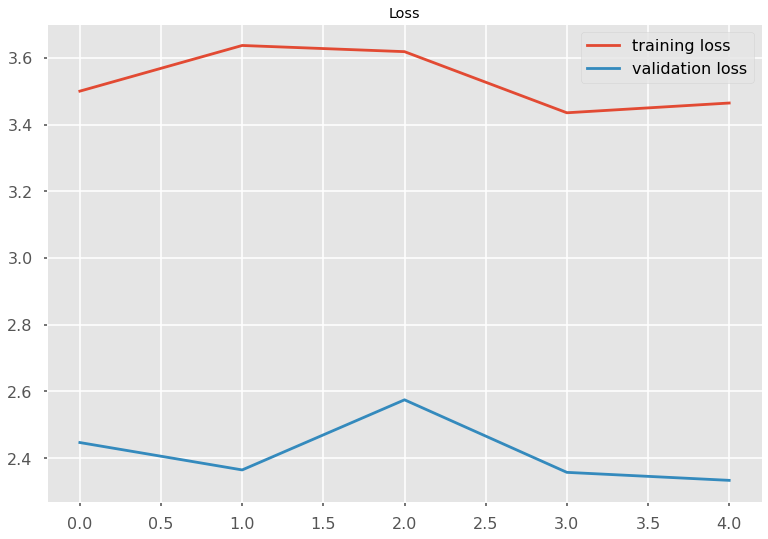

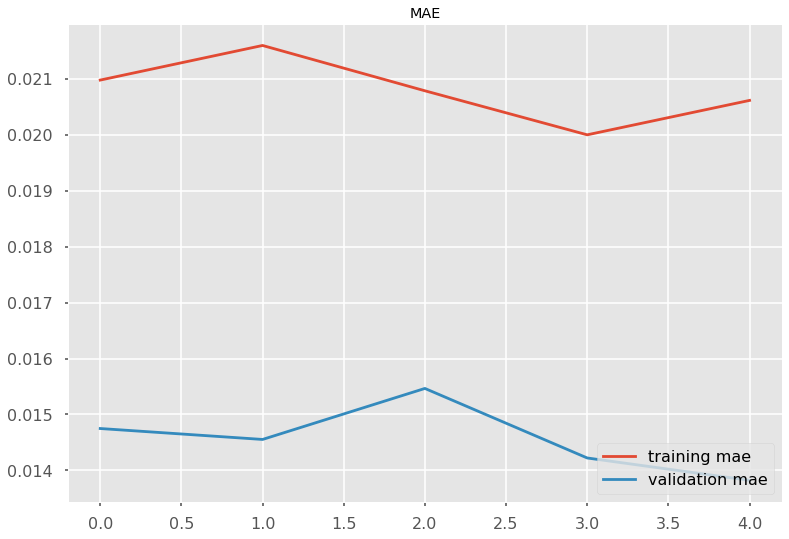

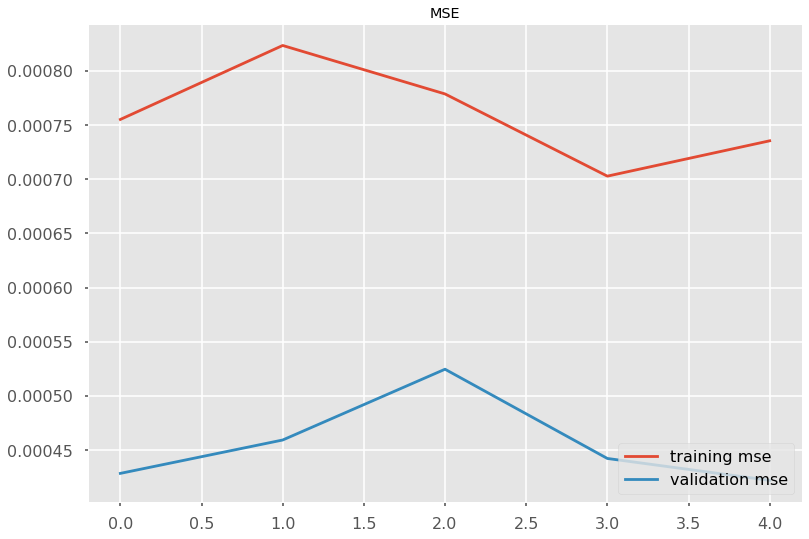

In [ ]:
plot_loss(history)
plot_mae(history)
plot_mse(history)

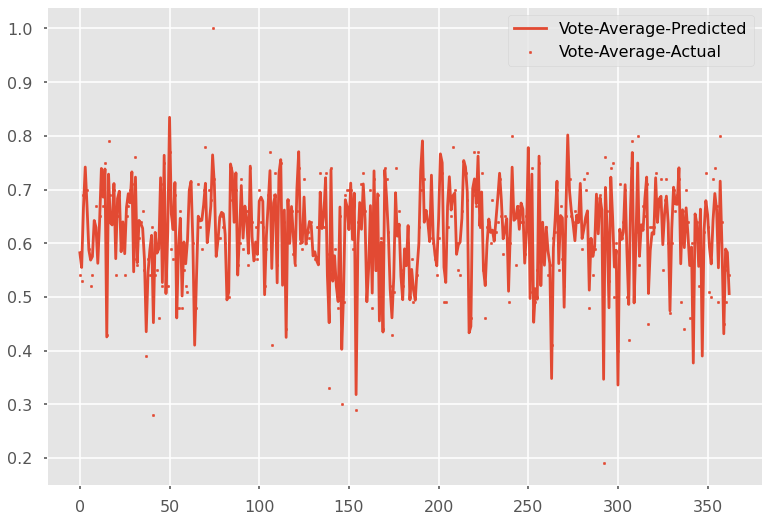

In [ ]:
import matplotlib.pyplot as plt
x_ax = range(len(X_img_val))
plt.scatter(x_ax, val_labels,  s=6, label="Vote-Average-Actual")
plt.plot(   x_ax, preds     ,       label="Vote-Average-Predicted")
plt.legend()
plt.show()

In [ ]:
print(cvsLoss)
print(cvsMAE)
print(cvsMSE)

['loss', 'loss', 'loss', 'loss', 'loss', 'loss', 'loss', 'loss', 'loss', 'loss', 'loss', 'loss', 'loss', 'loss', 'loss', 'loss', 'loss', 'loss', 'loss', 'loss', 'loss', 'loss', 'loss', 'loss', 'loss', 'loss', 'loss', 'loss', 'loss', 'loss']
['mae', 'mae', 'mae', 'mae', 'mae', 'mae', 'mae', 'mae', 'mae', 'mae', 'mae', 'mae', 'mae', 'mae', 'mae', 'mae', 'mae', 'mae', 'mae', 'mae', 'mae', 'mae', 'mae', 'mae', 'mae', 'mae', 'mae', 'mae', 'mae', 'mae']
['mse', 'mse', 'mse', 'mse', 'mse', 'mse', 'mse', 'mse', 'mse', 'mse', 'mse', 'mse', 'mse', 'mse', 'mse', 'mse', 'mse', 'mse', 'mse', 'mse', 'mse', 'mse', 'mse', 'mse', 'mse', 'mse', 'mse', 'mse', 'mse', 'mse']


In [ ]:
es = EarlyStopping(monitor='val_mse',patience=10)
csv_logger = CSVLogger('model_history_log_model_lstm.csv', append=True)
check_point = ModelCheckpoint(filepath='best_lstm_model_todate', save_best_only=True, save_weights_only=True)

In [ ]:
stacked_model7_linear_model = stacked_model7.fit([X_img_train, X_text_train,X_categ_train], 
                                                 train_labels, 
                                                 batch_size=100, 
                                                 epochs=50,
                                                 validation_data=([X_img_test, X_text_test,X_categ_test], test_labels), ###USE TEST HERE
                                                 callbacks = [csv_logger, check_point])  ###removed the Early stopping par

Train on 3261 samples, validate on 907 samples
Epoch 1/50
3261/3261 [==============================] - 689s 211ms/step - loss: 25.3095 - mae: 0.1525 - mse: 0.0466 - val_loss: 10.1874 - val_mae: 0.0601 - val_mse: 0.0052
Epoch 2/50
3261/3261 [==============================] - 683s 210ms/step - loss: 13.0266 - mae: 0.0776 - mse: 0.0096 - val_loss: 8.2234 - val_mae: 0.0488 - val_mse: 0.0035
Epoch 3/50
3261/3261 [==============================] - 684s 210ms/step - loss: 11.6506 - mae: 0.0693 - mse: 0.0077 - val_loss: 6.0135 - val_mae: 0.0348 - val_mse: 0.0020
Epoch 4/50
3261/3261 [==============================] - 685s 210ms/step - loss: 11.2296 - mae: 0.0661 - mse: 0.0069 - val_loss: 6.2059 - val_mae: 0.0353 - val_mse: 0.0021
Epoch 5/50
3261/3261 [==============================] - 683s 210ms/step - loss: 10.3007 - mae: 0.0606 - mse: 0.0059 - val_loss: 5.5317 - val_mae: 0.0316 - val_mse: 0.0017
Epoch 6/50
3261/3261 [==============================] - 684s 210ms/step - loss: 10.0660 - mae: 0.

In [ ]:
print("[INFO] predicting avg votes...")
preds = stacked_model7.predict([X_img_val, X_text_val,X_categ_val])
diff = preds.flatten() - val_labels
percentDiff = (diff / val_labels) * 100
absPercentDiff = np.abs(percentDiff)
mean = np.mean(absPercentDiff)
std = np.std(absPercentDiff)



[INFO] predicting avg votes...


In [ ]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
print('mean_absolute_error = ',mean_absolute_error(val_labels, preds))
print('mean_squared_error  = ',mean_squared_error(val_labels, preds))
print('r2_score            = ',r2_score(val_labels, preds))

mean_absolute_error =  0.030173726896280752
mean_squared_error  =  0.0017116981987668992
r2_score            =  0.8225868373943258


In [ ]:
def plot_loss(history):
  plt.title('Loss')
  plt.plot(history.history['loss'], label='train')
  plt.plot(history.history['val_loss'], label='test')
  plt.legend(['training loss', 'validation loss'], loc='upper right')
  plt.show()

def plot_acc(history):
  plt.title('Accuracy')
  plt.plot(history.history['accuracy'], label='train')
  plt.plot(history.history['val_accuracy'], label='test')
  plt.legend(['training accuracy', 'validation accuracy'], loc='lower right')
  plt.show()

In [ ]:
final_predictions=list(zip(preds.flatten(),val_labels))
type(final_predictions)
df=pd.DataFrame(final_predictions, columns=['predicted','actual'])
df['error']= df['actual'].sub(df['predicted'], axis = 0)
df

predicted  actual     error
0     0.572141    0.54 -0.032141
1     0.553942    0.53 -0.023942
2     0.677609    0.69  0.012391
3     0.749652    0.70 -0.049652
4     0.678041    0.70  0.021959
..         ...     ...       ...
358   0.606943    0.64  0.033057
359   0.431590    0.45  0.018410
360   0.586147    0.49 -0.096147
361   0.628797    0.55 -0.078797
362   0.538686    0.54  0.001314

[363 rows x 3 columns]

In [ ]:
df['actual']     = df['actual']*10
df['predicted']  = df['predicted']*10
df['error']      = df['error']*10
df['abs_error'] = df['error'].abs()
df

predicted  actual     error  abs_error
0     5.721415     5.4 -0.321415   0.321415
1     5.539416     5.3 -0.239416   0.239416
2     6.776088     6.9  0.123912   0.123912
3     7.496516     7.0 -0.496516   0.496516
4     6.780410     7.0  0.219590   0.219590
..         ...     ...       ...        ...
358   6.069427     6.4  0.330573   0.330573
359   4.315900     4.5  0.184100   0.184100
360   5.861470     4.9 -0.961470   0.961470
361   6.287971     5.5 -0.787971   0.787971
362   5.386863     5.4  0.013137   0.013137

[363 rows x 4 columns]

In [ ]:
df.loc[:,"abs_error"].mean()

0.31005180532282045

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
print('mean_absolute_error = ',mean_absolute_error(val_labels, preds))
print('mean_squared_error  = ',mean_squared_error(val_labels, preds))
print('r2_score            = ',r2_score(val_labels, preds))


mean_absolute_error =  0.03100518053228205
mean_squared_error  =  0.0017719365046488735
r2_score            =  0.8163432902758981


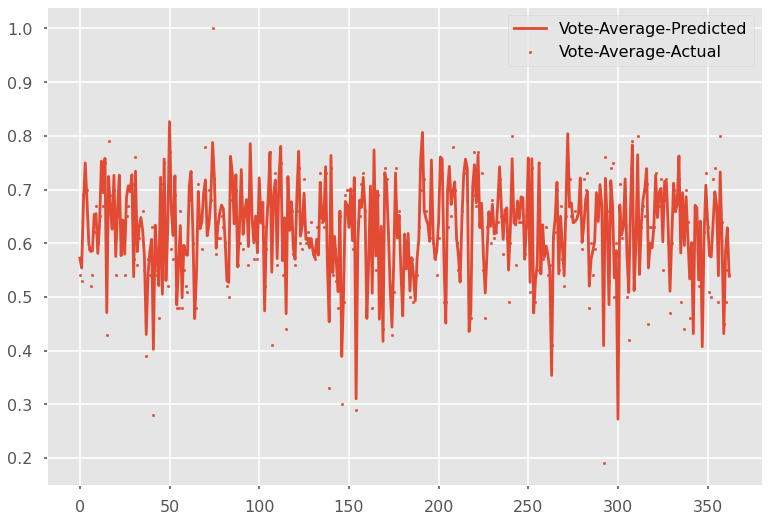

In [ ]:
import matplotlib.pyplot as plt
x_ax = range(len(X_img_val))
plt.scatter(x_ax, val_labels,  s=6, label="Vote-Average-Actual")
plt.plot(   x_ax, preds     ,       label="Vote-Average-Predicted")
plt.legend()
plt.show()

In [ ]:
stacked_model7.save('OnlyVAG_stacked_model7_July15_2020.h5')

In [ ]:
from keras.models import Model, load_model
history = load_model("MovieGen/MovieGenPosters/New_Approach_7/OnlyVAG_stacked_model7_July15_2020.h5")

Using TensorFlow backend.


In [ ]:
def plot_loss(history):
  plt.title('Loss')
  plt.plot(history.history['loss'], label='train')
  plt.plot(history.history['val_mse'], label='test')
  plt.legend(['training loss', 'validation loss'], loc='upper right')
  plt.show()



# **TEXT ONLY USING BIDIREC-LSTMS**

In [ ]:
from keras.layers import LSTM,Dense,Dropout,Embedding,CuDNNLSTM,Bidirectional

def compile_model_TEXT_ONLY(embedding_matrix):
  lstm_input = Input(shape=(MAX_SEQUENCE_LENGTH,))
  x = Embedding(embedding_matrix.shape[0], embedding_matrix.shape[1], mask_zero=True, input_length=MAX_SEQUENCE_LENGTH, trainable=False)(lstm_input)
  ###x = Dropout(0.3)(x)
  ###x = LSTM(64, return_sequences = True)(x)
  x = Bidirectional(LSTM(75))(x)
  ###x = Dropout(0.3)(x)
  ###x = LSTM(64)(x)
  x = Dense(32,activation = 'relu')(x)
  ###x = Dropout(0.3)(x)
  output = Dense(1, activation = 'linear')(x)

  model = Model(inputs=[lstm_input], outputs=[output])
  adam = Adam(lr=1e-3, decay=1e-3 / 200) ###Adam(lr=0.001, decay=1e-5)
  
  model.compile(loss='mean_absolute_percentage_error', optimizer=adam, metrics=['mae','mse'])
  return model

ImportError: ignored

In [ ]:
textOnly_model = compile_model_TEXT_ONLY(word2vec_embedding_matrix)
textOnly_model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 8190)              0         
_________________________________________________________________
embedding_7 (Embedding)      (None, 8190, 300)         16923600  
_________________________________________________________________
bidirectional_6 (Bidirection (None, 150)               225600    
_________________________________________________________________
dense_14 (Dense)             (None, 32)                4832      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 33        
Total params: 17,154,065
Trainable params: 230,465
Non-trainable params: 16,923,600
_________________________________________________________________


In [ ]:
word2vec_multi_modal_model = textOnly_model.fit([X_text_train], train_labels, 
                                                batch_size=50, 
                                                epochs=10,
                                                validation_data=([X_text_val], val_labels))
                                                ###callbacks = [es, csv_logger, check_point])

Train on 3261 samples, validate on 363 samples
Epoch 1/10
3261/3261 [==============================] - 953s 292ms/step - loss: 25.7708 - mae: 0.1529 - mse: 0.0513 - val_loss: 14.5681 - val_mae: 0.0856 - val_mse: 0.0115
Epoch 2/10
3261/3261 [==============================] - 933s 286ms/step - loss: 13.3354 - mae: 0.0751 - mse: 0.0093 - val_loss: 14.3603 - val_mae: 0.0784 - val_mse: 0.0102
Epoch 3/10
3261/3261 [==============================] - 960s 294ms/step - loss: 12.5899 - mae: 0.0710 - mse: 0.0087 - val_loss: 14.3265 - val_mae: 0.0803 - val_mse: 0.0105
Epoch 4/10
3261/3261 [==============================] - 946s 290ms/step - loss: 12.1506 - mae: 0.0688 - mse: 0.0082 - val_loss: 14.2536 - val_mae: 0.0809 - val_mse: 0.0107
Epoch 5/10
3261/3261 [==============================] - 944s 290ms/step - loss: 11.8628 - mae: 0.0670 - mse: 0.0078 - val_loss: 14.3588 - val_mae: 0.0801 - val_mse: 0.0105
Epoch 6/10
3261/3261 [==============================] - 936s 287ms/step - loss: 11.2407 - mae

In [ ]:
score = word2vec_model.evaluate(X_text_val, val_labels, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 14.717759996734703
Test accuracy: 0.002754820976406336


In [ ]:
print("[INFO] predicting avg votes...")
preds = word2vec_model.predict([X_text_test])
diff = preds.flatten() - test_labels
percentDiff = (diff / test_labels) * 100
absPercentDiff = np.abs(percentDiff)

mean = np.mean(absPercentDiff)
std = np.std(absPercentDiff)

##print(diff,percentDiff,absPercentDiff)

##print(mean,std)
##print(diff)
##print(preds*10,test_labels*10)





[INFO] predicting avg votes...


predicted  actual     error
0     0.581075    0.64  0.058925
1     0.581943    0.47 -0.111943
2     0.586580    0.74  0.153420
3     0.597936    0.70  0.102064
4     0.586207    0.66  0.073793
..         ...     ...       ...
902   0.608040    0.56 -0.048040
903   0.595633    0.57 -0.025633
904   0.557701    0.50 -0.057701
905   0.608569    0.71  0.101431
906   0.591067    0.51 -0.081067

[907 rows x 3 columns]

In [ ]:
final_predictions=list(zip(preds.flatten(),test_labels))
type(final_predictions)
df=pd.DataFrame(final_predictions, columns=['predicted','actual'])
df['error']= df['actual'].sub(df['predicted'], axis = 0)
df

predicted  actual     error
0     0.581075    0.64  0.058925
1     0.581943    0.47 -0.111943
2     0.586580    0.74  0.153420
3     0.597936    0.70  0.102064
4     0.586207    0.66  0.073793
..         ...     ...       ...
902   0.608040    0.56 -0.048040
903   0.595633    0.57 -0.025633
904   0.557701    0.50 -0.057701
905   0.608569    0.71  0.101431
906   0.591067    0.51 -0.081067

[907 rows x 3 columns]

In [ ]:
df['actual']     = df['actual']*10
df['predicted']  = df['predicted']*10
df['error']      = df['error']*10
df['abs_error'] = df['error'].abs()
df[['abs_error']].mean(axis=1)

0      0.589252
1      1.119430
2      1.534200
3      1.020636
4      0.737931
         ...   
902    0.480400
903    0.256331
904    0.577011
905    1.014311
906    0.810668
Length: 907, dtype: float64

In [ ]:
df.loc[:,"abs_error"].mean()

0.8039577743841505

In [ ]:
corrrelation    = df.corr(method="pearson");
print("Pearson correlation coefficient:");
print(corrrelation);


Pearson correlation coefficient:
           predicted    actual     error
predicted   1.000000 -0.045796 -0.379232
actual     -0.045796  1.000000  0.941698
error      -0.379232  0.941698  1.000000


In [ ]:
corrrelation    = df.corr(method="kendall");
print("Kendall Tau correlation coefficient:");
print(corrrelation);
 

Kendall Tau correlation coefficient:
           predicted    actual     error
predicted   1.000000 -0.034027 -0.184770
actual     -0.034027  1.000000  0.862506
error      -0.184770  0.862506  1.000000


In [ ]:
print(X_img_train.shape[1])
print(X_img_train.shape[2])
print(X_img_train.shape[3])

115
75
3


**TEXT ONLY**

In [ ]:
!pip install pdpbox
!pip install eli5

from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from pdpbox import pdp, get_dataset, info_plots
from eli5.sklearn import PermutationImportance
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import FeatureUnion
from collections import Counter
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import warnings
import eli5
warnings.filterwarnings('ignore')
init_notebook_mode(connected=True)

     |████████████████████████████████| 57.7MB 54kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.0-cp36-none-any.whl size=57690722 sha256=d4d2a0ea3416f5554db6aa3ed646f539db2ca4665e93c4bc9a2452ab9986af1b
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox
     |████████████████████████████████| 112kB 3.5MB/s 


In [ ]:
dataset = pd.read_csv("/content/drive/My Drive/MovieContent/dataset_mod.csv")

In [ ]:
dataset

Unnamed: 0  ...                                       poster_paths
0              0  ...  /content/drive/My Drive/MovieContent/dataset/p...
1              1  ...  /content/drive/My Drive/MovieContent/dataset/p...
2              2  ...  /content/drive/My Drive/MovieContent/dataset/p...
3              3  ...  /content/drive/My Drive/MovieContent/dataset/p...
4              4  ...  /content/drive/My Drive/MovieContent/dataset/p...
...          ...  ...                                                ...
4659        4725  ...  /content/drive/My Drive/MovieContent/dataset/p...
4660        4727  ...  /content/drive/My Drive/MovieContent/dataset/p...
4661        4728  ...  /content/drive/My Drive/MovieContent/dataset/p...
4662        4729  ...  /content/drive/My Drive/MovieContent/dataset/p...
4663        4731  ...  /content/drive/My Drive/MovieContent/dataset/p...

[4664 rows x 12 columns]

In [ ]:
projects=dataset

In [ ]:
projects.columns

Index(['Unnamed: 0', 'original_title', 'overview', 'id', 'genres',
       'genre_list', 'vote_average', 'keywords', 'production_companies',
       'cast', 'crew', 'poster_paths'],
      dtype='object')

In [ ]:
projects['ratings'] = pd.qcut(projects['vote_average'], q=10, labels=['A1','A2','B1','B2','C1','C2','D1','D2','E1','E2'])

In [ ]:
projects

Unnamed: 0  ... ratings
0              0  ...      E1
1              1  ...      D2
2              2  ...      C2
3              3  ...      E2
4              4  ...      C1
...          ...  ...     ...
4659        4725  ...      D2
4660        4727  ...      D1
4661        4728  ...      B2
4662        4729  ...      D2
4663        4731  ...      C2

[4664 rows x 13 columns]

In [ ]:
projects = projects.dropna()
projects = projects.drop(['Unnamed: 0','original_title','genres','genre_list', 'vote_average', 'keywords', 'production_companies','cast', 'crew', 'poster_paths'], axis = 1)

In [ ]:
projects

overview      id ratings
0     In 2154, humans have depleted Earth's natural ...   19995      E1
1     In order to control the oceans, Lord Cutler Be...     285      D2
2     A posthumous message from the previous M leads...  206647      C2
3     Bane, a mysterious terrorist and former member...   49026      E2
4     In 1881, Edgar Rice Burroughs attends the fune...   49529      C1
...                                                 ...     ...     ...
4659  Two engineers – Aaron and Abe – supplement the...   14337      D2
4660  After breaking out of jail in a small Mexican ...    9367      D1
4661  The honeymoon period ends quickly for Buzzy (B...   72766      B2
4662  "Signed, Sealed, Delivered" introduces a dedic...  231617      D2
4663  Ever since the second grade when he first saw ...   25975      C2

[4664 rows x 3 columns]

In [ ]:
label = projects.ratings

In [ ]:
label

0       E1
1       D2
2       C2
3       E2
4       C1
        ..
4659    D2
4660    D1
4661    B2
4662    D2
4663    C2
Name: ratings, Length: 4664, dtype: category
Categories (10, object): [A1 < A2 < B1 < B2 ... D1 < D2 < E1 < E2]

In [ ]:
def clean_name(x):
    words = x.lower().split()
    cln = [wrd for wrd in words if not wrd[0].isdigit()]
    return " ".join(cln)
projects["cleaned_overview"] = projects["overview"].apply(lambda x : clean_name(x))


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
projects['ratings_id'] = projects['ratings'].factorize()[0]

In [ ]:
projects

overview  ...  ratings_id
0     In 2154, humans have depleted Earth's natural ...  ...           0
1     In order to control the oceans, Lord Cutler Be...  ...           1
2     A posthumous message from the previous M leads...  ...           2
3     Bane, a mysterious terrorist and former member...  ...           3
4     In 1881, Edgar Rice Burroughs attends the fune...  ...           4
...                                                 ...  ...         ...
4659  Two engineers – Aaron and Abe – supplement the...  ...           1
4660  After breaking out of jail in a small Mexican ...  ...           8
4661  The honeymoon period ends quickly for Buzzy (B...  ...           5
4662  "Signed, Sealed, Delivered" introduces a dedic...  ...           1
4663  Ever since the second grade when he first saw ...  ...           2

[4664 rows x 5 columns]

In [ ]:
projects.groupby('ratings').ratings_id.count()

ratings
A1    523
A2    529
B1    478
B2    404
C1    400
C2    621
D1    407
D2    506
E1    361
E2    435
Name: ratings_id, dtype: int64

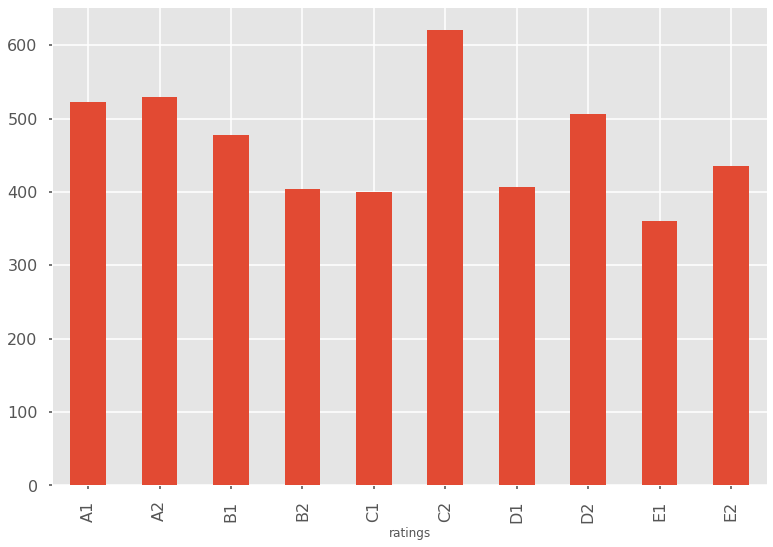

In [ ]:
projects.groupby('ratings').ratings_id.count().plot.bar(ylim=0)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 5), stop_words='english')
features = tfidf.fit_transform(projects.cleaned_overview).toarray()
labels = projects.ratings_id

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)
pd.set_option("max_columns", None)

In [ ]:
def count_unique_index(df, by):                                                                                                                                                 
    return df.groupby(by).size().reset_index().rename(columns={0:'count'})                                                                                                      

count_unique_index(projects, ['ratings','ratings_id']) 

In [ ]:
projects.loc[projects['ratings'] == 'E2'] 
##A1-9
##A2-7

##B1-6
##B2-5

##C1-4
##C2-2

##D1-8
##D2-1

##E1-0
##E2-3

In [ ]:
projects

overview      id ratings  \
0     In 2154, humans have depleted Earth's natural ...   19995      E1   
1     In order to control the oceans, Lord Cutler Be...     285      D2   
2     A posthumous message from the previous M leads...  206647      C2   
3     Bane, a mysterious terrorist and former member...   49026      E2   
4     In 1881, Edgar Rice Burroughs attends the fune...   49529      C1   
5     On a school trip, high school senior Peter Par...     559      B2   
6     When the kingdom's most wanted-and most charmi...   38757      E2   
7     In the Eastern European country of Sokovia, th...   99861      E1   
8     Lord Voldemort is tightening his grip on both ...     767      E2   
9     In a flashback, Bruce Wayne falls into a cave ...  209112      B1   
10    Five years ago, Superman abandoned his adopted...    1452      A2   
11    The game begins with James Bond kidnapping Mr....   10764      C1   
12    The wedding of Will Turner and Elizabeth Swann...      58      D2   
13    Set in 1933 in a San Francisco funfair, a boy ...   57201      B2   
14    The planet Krypton is destabilized from mining...   49521      C2   
15    In Narnia, almost 1,300 years have passed afte...    2454      C2   
16    The Asgardian Loki encounters the Other, the l...   24428      E2   
17    After a failed attempt to rescue his first mat...    1865      C2   
18    After a government agency makes first contact ...   41154      C1   
19    Bilbo and the Dwarves watch from the Lonely Mo...  122917      E1   
20    A young Peter Parker discovers that his father...    1930      C2   
21    In the year 1199, Robin Longstride serves as a...   20662      C1   
22    In the village of Bree, Gandalf the Grey meets...   57158      E2   
23    The story is set in an alternate Earth dominat...    2268      B1   
24    In 1933, during the Great Depression, New York...     254      D1   
25    In 1996, treasure hunter Brock Lovett and his ...     597      E2   
26    In 1991, the brainwashed super-soldier James "...  271110      E1   
27    In 2005, the Gliese planetary system is discov...   44833      A2   
28    Brothers Zach and Gray Mitchell visit Jurassic...  135397      C2   
29    When Bond's latest assignment goes gravely wro...   37724      D2   
30    On a school trip, high school senior Peter Par...     558      D1   
31    Tony Stark, who has inherited the defense cont...   68721      D2   
32    In 1871, troubled by a strange recurring dream...   12155      C2   
33    Twenty years in the past, Professor Charles Xa...   36668      C2   
34    Michael Wazowski, a young lonely monster who i...   62211      D2   
35    In the year 17,000 B.C., the original Transfor...    8373      B2   
36    Sixty-five million years ago, an alien race kn...   91314      B1   
37    In 1905 Kansas, Oscar Diggs is a magician and ...   68728      B1   
38    A young Peter Parker discovers that his father...  102382      C2   
39    In 1989, seven years after the events of the f...   20526      C2   
40    In a world populated by anthropomorphic talkin...   49013      B1   
41    Billions of years ago, the Guardians of the Un...   44912      A2   
42    Andy is preparing to leave for college. He has...   10193      E2   
43    In 2003, Dr. Serena Kogan of Cyberdyne Systems...     534      B2   
44    Five years after escaping from the U.S., Domin...  168259      E1   
45    Former UN employee Gerry Lane, his wife Karin ...   72190      D1   
46    In a dystopian 2023, Sentinels have been progr...  127585      E2   
47    In 2259, Captain James T. Kirk is removed from...   54138      E2   
48    After climbing a giant beanstalk, Jack discove...   81005      A2   
49    In December 1929, Nick Carraway, a World War I...   64682      E1   
50    Setting\nThe film seems to be set in ancient P...    9543      C1   
51    In 2013, an interdimensional portal called "th...   68726      D1   
52    In 1961, the Ark, a Cybertronian spacecraft ca...   38356      C1 

In [ ]:
ratings_to_id = {'A1':9, 'A2':7, 'B1':6, 'B2':5, 'C1':4, 'C2':2, 'D1':8, 'D2':1, 'E1':0, 'E2':3}
id_to_ratings = {0: 'E1', 1: 'D2', 2: 'C2', 3: 'E2', 4: 'C1', 5: 'B2', 6: 'B1', 7: 'A2', 8: 'D1', 9: 'A1'}

# NGRAM

In [ ]:
# Use chi-square analysis to find corelation between features (importantce of words) and labels(news category) 
from sklearn.feature_selection import chi2

N = 10  # We are going to look for top 3 categories

#For each category, find words that are highly corelated to it
for ratings, ratings_id in sorted(ratings_to_id.items()):
  features_chi2 = chi2(features, labels == ratings_id)                   # Do chi2 analyses of all items in this category
  indices = np.argsort(features_chi2[0])                                  # Sorts the indices of features_chi2[0] - the chi-squared stats of each feature
  feature_names = np.array(tfidf.get_feature_names())[indices]            # Converts indices to feature names ( in increasing order of chi-squared stat values)
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]         # List of single word features ( in increasing order of chi-squared stat values)
  bigrams = [v for v in feature_names if len(v.split(' '))  == 2]          # List for two-word features ( in increasing order of chi-squared stat values)
  trigrams = [v for v in feature_names if len(v.split(' ')) == 3]          # List for two-word features ( in increasing order of chi-squared stat values)
  n4grams = [v for v in feature_names if len(v.split(' '))  == 4]          # List for two-word features ( in increasing order of chi-squared stat values)
  n5grams = [v for v in feature_names if len(v.split(' '))  == 5]          # List for two-word features ( in increasing order of chi-squared stat values)
  print("Ratings # '{}':".format(ratings_id))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:]))) # Print 3 unigrams with highest Chi squared stat
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:]))) # Print 3 bigrams with highest Chi squared stat
  print("  . Most correlated trigrams:\n       . {}".format('\n       . '.join(trigrams[-N:]))) # Print 3 bigrams with highest Chi squared stat
  print("  . Most correlated 4 grams:\n       . {}".format('\n       . '.join(n4grams[-N:]))) # Print 3 bigrams with highest Chi squared stat
  print("  . Most correlated 5 grams:\n       . {}".format('\n       . '.join(n5grams[-N:]))) # Print 3 bigrams with highest Chi squared stat

Ratings # '9':
  . Most correlated unigrams:
       . strands
       . authenticity
       . carlton
       . downfall
       . barney
       . misadventures
       . evil
       . exorcism
       . orchestrates
       . horny
  . Most correlated bigrams:
       . sparks fly
       . stay way
       . killing machine
       . martha vineyard
       . needs prove
       . college students
       . set world
       . bank heist
       . series misadventures
       . fight lives
  . Most correlated trigrams:
       . events previous film
       . successful real estate
       . local radio station
       . high school years
       . reluctantly agrees help
       . falls love sight
       . suddenly appears kills
       . gain upper hand
       . suffering writer block
       . martial arts tournament
  . Most correlated 4 grams:
       . martin luther king jr
       . post traumatic stress disorder
       . south central los angeles
       . united states air force
       . living new yo

In [ ]:
##dimension reduction 
from sklearn.manifold import TSNE

# Sampling a subset of our dataset because t-SNE is computationally expensive
SAMPLE_SIZE = int(len(features) * 0.3)
np.random.seed(0)
indices = np.random.choice(range(len(features)), size=SAMPLE_SIZE, replace=False)          # Randomly select 30 % of samples
projected_features = TSNE(n_components=2, random_state=0).fit_transform(features[indices]) # Array of all projected features of 30% of Randomly chosen samples 

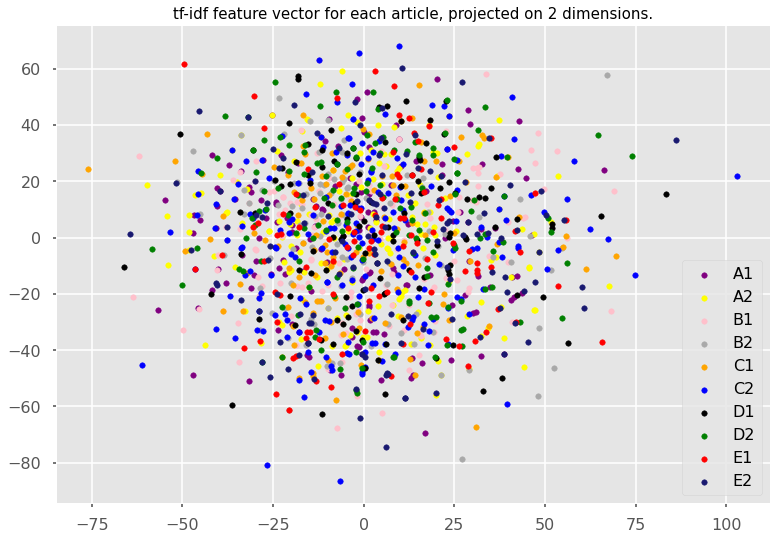

In [ ]:
colors = ['red', 'green','blue', 'midnightblue', 'orange', 'darkgrey','pink','yellow','black','purple']

# Find points belonging to each category and plot them
for ratings, ratings_id in sorted(ratings_to_id.items()):
    points = projected_features[(labels[indices] == ratings_id).values]
    plt.scatter(points[:, 0], points[:, 1], s=30, c=colors[ratings_id], label=ratings)
plt.title("tf-idf feature vector for each article, projected on 2 dimensions.",
          fontdict=dict(fontsize=15))
plt.legend()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score


models = [
    
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    MultinomialNB(),
    LogisticRegression(random_state=0),
    KNeighborsClassifier(n_neighbors=3)
]

In [ ]:
CV = 5  # Cross Validate with 5 different folds of 20% data ( 80-20 split with 5 folds )

#Create a data frame that will store the results for all 5 trials of the 3 different models
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = [] # Initially all entries are empty

#For each Algorithm 
for model in models:
  model_name = model.__class__.__name__
  # create 5 models with different 20% test sets, and store their accuracies
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  # Append all 5 accuracies into the entries list ( after all 3 models are run, there will be 3x5 = 15 entries)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))

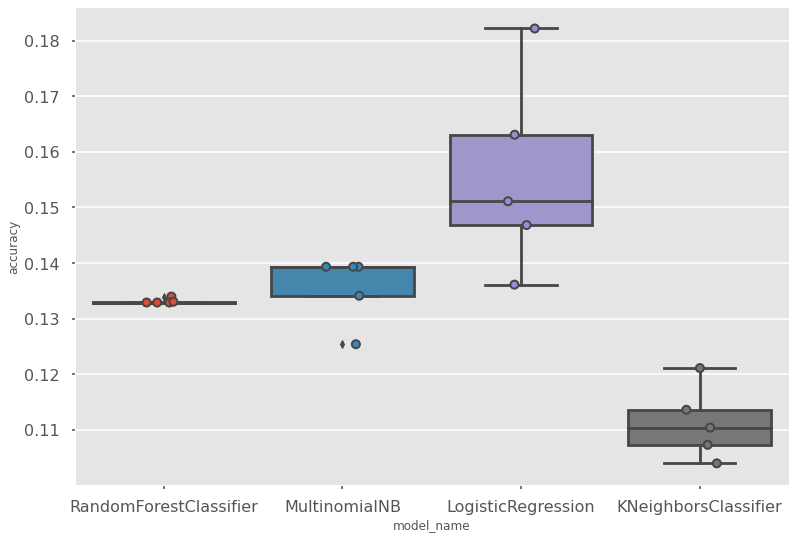

In [ ]:
# Store the entries into the results dataframe and name its columns    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)

In [ ]:
cv_df.groupby('model_name').accuracy.mean()

model_name
KNeighborsClassifier      0.111277
LogisticRegression        0.155876
MultinomialNB             0.135506
RandomForestClassifier    0.133147
Name: accuracy, dtype: float64

In [ ]:
cv_df

model_name  fold_idx  accuracy
0   RandomForestClassifier         0  0.132905
1   RandomForestClassifier         1  0.132905
2   RandomForestClassifier         2  0.133976
3   RandomForestClassifier         3  0.132905
4   RandomForestClassifier         4  0.133047
5            MultinomialNB         0  0.125402
6            MultinomialNB         1  0.139335
7            MultinomialNB         2  0.139335
8            MultinomialNB         3  0.139335
9            MultinomialNB         4  0.134120
10      LogisticRegression         0  0.136120
11      LogisticRegression         1  0.182208
12      LogisticRegression         2  0.151125
13      LogisticRegression         3  0.146838
14      LogisticRegression         4  0.163090
15    KNeighborsClassifier         0  0.110397
16    KNeighborsClassifier         1  0.113612
17    KNeighborsClassifier         2  0.121115
18    KNeighborsClassifier         3  0.103966
19    KNeighborsClassifier         4  0.107296

In [ ]:

from sklearn.model_selection import train_test_split

model = RandomForestClassifier()

#Split Data 
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, projects.index, test_size=0.33, random_state=0)

#Train Algorithm
model.fit(X_train, y_train)

# Make Predictions
y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)



In [ ]:
## add text features : top 100
vec = TfidfVectorizer(max_features=100, ngram_range=(1, 2), lowercase=True, stop_words="english", min_df=6)
X = vec.fit_transform(projects["cleaned_overview"].values)


In [ ]:
## append to original dataframe
vectors_df = pd.DataFrame(X.toarray(), columns=["_"+xx for xx in vec.get_feature_names()])
projects1_df = pd.concat([projects, vectors_df], axis=1)

In [ ]:
projects1_df.count()

_arrives     4664
_asks        4664
_attack      4664
_attempts    4664
_away        4664
             ... 
_woman       4664
_work        4664
_world       4664
_years       4664
_young       4664
Length: 100, dtype: int64

In [ ]:
projects1_df = projects1_df.drop(['overview','id','ratings','cleaned_overview'], axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(projects1_df, label, test_size = 0.25, random_state = 2)
X_train2, y_train2 = X_train[:15000], y_train[:15000]
X_test2, y_test2 = X_test[:1000], y_test[:1000]

In [ ]:
model2 = RandomForestClassifier(random_state=1).fit(X_train2, y_train2)
y_pred = model2.predict(X_test2)

In [ ]:
####### Interpretation 

from plotly import tools

perm = PermutationImportance(model2, random_state=1).fit(X_test2, y_test2)
pi_df = eli5.explain_weights_df(perm, feature_names = X_test2.columns.tolist(), feature_filter=lambda x: x[0] == '_')
pi_df["feature"] = pi_df["feature"].apply(lambda x : x[1:])
highs = pi_df[pi_df.weight >= 0.001]
med = pi_df[(pi_df.weight > -0.0005) & (pi_df.weight < 0.001)]
lows = pi_df[pi_df.weight <= -0.0005]

trace1 = go.Bar(
        orientation = "h",
        y = highs.feature[::-1],
        x = highs.weight[::-1],
        marker = dict(opacity = 0.4, color = "green" ), error_x = dict(type='data', color="#9fa3a3", array=list(highs["std"][::-1]), visible=True))
trace2 = go.Bar(
        orientation = "h",
        y = med.feature[:15][::-1],
        x = med.weight[:15][::-1],
        marker = dict(opacity = 0.4, color = "gray"), error_x = dict(type='data', color="#9fa3a3", array=list(med["std"][:15][::-1]), visible=True))
trace3 = go.Bar(
        orientation = "h",
        y = lows.feature,
        x = lows.weight,
        marker = dict(opacity = 0.4, color = "red"), error_x = dict(type='data', color="#9fa3a3", array=list(lows["std"][::-1]), visible=True))

ttls = ["Positive Impact","", "Moderate + or - Impact" ,"", "Negative Impact"]
fig = tools.make_subplots(rows=1, cols=5, print_grid=False, subplot_titles = ttls)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 3)
fig.append_trace(trace3, 1, 5)

fig['layout'].update(showlegend=False, title='Impact of Words Used in Project Name - Permutation Importance')
iplot(fig, filename='simple-subplot-with-annotations')

###**IMAGE ONLY NON-VGG**

In [ ]:
###import training images normalized
with open('/content/drive/My Drive/MovieContent/train_np_imgs_norm','rb') as f: X_img_train = pickle.load(f)
X_img_train.shape 


(3357, 115, 75, 3)

In [ ]:
with open('/content/drive/My Drive/MovieContent/test_np_imgs_norm', 'rb') as f: X_img_test = pickle.load(f)
X_img_test.shape

(932, 115, 75, 3)

In [ ]:
with open('/content/drive/My Drive/MovieContent/val_np_img_norm', 'rb') as f: X_img_val = pickle.load(f)
X_img_val.shape

(374, 115, 75, 3)

In [ ]:
###MODEL PRIORITY - - SAVE MODEL AS IMAGE_ONLY_NONVGG_MODEL1.h5
'''MODEL RESULTS
mean_absolute_error =  0.06912059881731906
mean_squared_error  =  0.008053444148312
r2_score            =  -0.00773004871645444

Mean of Absolute percent Difference = 12.241577616642973
Standard Deviation of Absolute percent Difference = 12.241577616642973

'''
def compile_model_IMG_ONLY():

  print(X_img_train.shape[1], X_img_train.shape[2], X_img_train.shape[3])
  cnn_input = Input(shape=(X_img_train.shape[1], X_img_train.shape[2], X_img_train.shape[3]))
  y = Conv2D(32, (3, 3), activation='relu', input_shape=(X_img_train.shape[1], X_img_train.shape[2], X_img_train.shape[3]))(cnn_input)
  y = MaxPooling2D(2, 2)(y)
  y = Conv2D(64, (3, 3), activation='relu')(y)
  y = MaxPooling2D(2, 2)(y)
  y = Conv2D(128, (3, 3), activation='relu')(y)
  y = MaxPooling2D(2, 2)(y)
  y = Conv2D(128, (3, 3), activation='relu')(y)
  y = MaxPooling2D(2, 2)(y)
  y = Flatten()(y)
  y = Dropout(0.3)(y)
  y = Dense(512, activation='relu')(y)
  output = Dense(1)(y)

  model = Model(inputs=[cnn_input], outputs=[output])
  adam = Adam(lr=0.001, decay=1e-5)
  
  model.compile(loss='mean_absolute_percentage_error', optimizer=adam, metrics=['mae', 'mse'])
  return model

In [ ]:
###MODEL PRIORITY - SAVE MODEL AS IMAGE_ONLY_NONVGG_MODEL2.h5
'''MODEL RESULTS
mean_absolute_error =  0.06900801650960067
mean_squared_error  =  0.008041616949168842
r2_score            =  -0.006250107495130886

Mean of Absolute percent Difference = 12.148498027712645
Standard Deviation of Absolute percent Difference = 12.148498027712645

'''
###CHOOSE ANY ONE MODEL
def compile_model_IMG_ONLY():

  print(X_img_train.shape[1], X_img_train.shape[2], X_img_train.shape[3])
  cnn_input = Input(shape=(X_img_train.shape[1], X_img_train.shape[2], X_img_train.shape[3]))
  y = Conv2D(32, (3, 3), activation='relu', input_shape=(X_img_train.shape[1], X_img_train.shape[2], X_img_train.shape[3]))(cnn_input)
  y = MaxPooling2D(2, 2)(y)
  y = Conv2D(64, (3, 3), activation='relu')(y)
  y = MaxPooling2D(2, 2)(y)
  y = Conv2D(128, (3, 3), activation='relu')(y)
  y = MaxPooling2D(2, 2)(y)
  y = Conv2D(128, (3, 3), activation='relu')(y)
  y = MaxPooling2D(2, 2)(y)
  y = Flatten()(y)
  y = Dropout(0.3)(y)
  y = Dense(512, activation='relu')(y)
  output = Dense(1, activation='sigmoid')(y)

  model = Model(inputs=[cnn_input], outputs=[output])
  adam = Adam(lr=0.001, decay=1e-5)
  
  model.compile(loss='mean_absolute_percentage_error', optimizer=adam, metrics=['mae', 'mse'])
  return model

In [ ]:
###MODEL PRIORITY - SAVE MODEL AS IMAGE_ONLY_NONVGG_MODEL3.h5
'''MODEL RESULTS
mean_absolute_error =  0.06789943691233206
mean_squared_error  =  0.007992207573433364
r2_score            =  -6.749646561265976e-05

Mean of Absolute percent Difference = 12.122224041683582
Standard Deviation of Absolute percent Difference = 12.122224041683582

'''
###CHOOSE ANY ONE MODEL
def compile_model_IMG_ONLY():

  print(X_img_train.shape[1], X_img_train.shape[2], X_img_train.shape[3])
  cnn_input = Input(shape=(X_img_train.shape[1], X_img_train.shape[2], X_img_train.shape[3]))
  y = Conv2D(128, (3, 3), activation='relu', input_shape=(X_img_train.shape[1], X_img_train.shape[2], X_img_train.shape[3]))(cnn_input)
  y = MaxPooling2D(2, 2)(y)
  y = Conv2D(64, (3, 3), activation='relu')(y)
  y = MaxPooling2D(2, 2)(y)
  y = Conv2D(128, (3, 3), activation='relu')(y)
  y = MaxPooling2D(2, 2)(y)
  y = Conv2D(128, (3, 3), activation='relu')(y)
  y = MaxPooling2D(2, 2)(y)
  y = Flatten()(y)
  y = Dropout(0.3)(y)
  y = Dense(512, activation='relu')(y)
  output = Dense(1, activation='linear')(y)

  model = Model(inputs=[cnn_input], outputs=[output])
  adam = Adam(lr=0.001, decay=1e-5)
  
  model.compile(loss='mean_absolute_percentage_error', optimizer=adam, metrics=['mae', 'mse'])
  return model

In [ ]:
###MODEL PRIORITY - SAVE MODEL AS IMAGE_ONLY_NONVGG_MODEL4.h5
'''MODEL RESULTS
###
###
###
###
###
'''
from tensorflow.keras.layers import BatchNormalization
def compile_model_IMG_ONLY():

  print(X_img_train.shape[1], X_img_train.shape[2], X_img_train.shape[3])
  cnn_input = Input(shape=(X_img_train.shape[1], X_img_train.shape[2], X_img_train.shape[3]))
  y = Conv2D(16, (3, 3), activation='relu', input_shape=(X_img_train.shape[1], X_img_train.shape[2], X_img_train.shape[3]))(cnn_input)
  y = BatchNormalization(axis=-1)(y)
  y = MaxPooling2D(2, 2)(y)

  y = Conv2D(32, (3, 3), activation='relu')(y)
  y = BatchNormalization(axis=-1)(y)
  y = MaxPooling2D(2, 2)(y)

  y = Conv2D(64, (3, 3), activation='relu')(y)
  y = BatchNormalization(axis=-1)(y)
  y = MaxPooling2D(2, 2)(y)

  ###y = Conv2D(128, (3, 3), activation='relu')(y)
  ###y = BatchNormalization(axis=-1)(y)
  ###y = MaxPooling2D(2, 2)(y)

  y = Flatten()(y)
  y = Dense(16)(y)
  y = Activation("relu")(y)
  y = BatchNormalization(axis=-1)(y)
  y = Dropout(0.5)(y)
  
  y = Dense(4)(y)
  y = Activation("relu")(y)
  
  output = Dense(1, activation="linear")(y)
  

  model = Model(inputs=[cnn_input], outputs=[output])
  adam = Adam(lr=1e-3, decay=1e-3 / 200)
  
  model.compile(loss='mean_absolute_percentage_error', optimizer=adam, metrics=['mae', 'mse'])
  return model

In [ ]:
imgonly_model = compile_model_IMG_ONLY()
imgonly_model.summary()

115 75 3
Model: "functional_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 115, 75, 3)]      0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 113, 73, 32)       896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 56, 36, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 54, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 27, 17, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 25, 15, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 12, 7, 1

In [ ]:
with open('/content/drive/My Drive/MovieContent/train_labels', 'rb') as f: train_labels = pickle.load(f)
train_labels.shape

(3357,)

In [ ]:
with open('/content/drive/My Drive/MovieContent/test_labels', 'rb') as f: test_labels = pickle.load(f)
test_labels.shape

(932,)

In [ ]:
with open('/content/drive/My Drive/MovieContent/val_labels', 'rb') as f: val_labels = pickle.load(f)
val_labels.shape

(374,)

In [ ]:
test_labels

In [ ]:
imgONLY_model = imgonly_model.fit([X_img_train], train_labels, 
                                                batch_size=32, 
                                                epochs=200,
                                                validation_data=([X_img_test], test_labels))
                                                ###callbacks = [es, csv_logger, check_point])

Epoch 1/200
105/105 [==============================] - 1s 12ms/step - loss: 24.4237 - mae: 0.1460 - mse: 0.0530 - val_loss: 16.0043 - val_mae: 0.0787 - val_mse: 0.0106
Epoch 2/200
105/105 [==============================] - 1s 9ms/step - loss: 14.0944 - mae: 0.0814 - mse: 0.0107 - val_loss: 18.3360 - val_mae: 0.0878 - val_mse: 0.0133
Epoch 3/200
105/105 [==============================] - 1s 9ms/step - loss: 13.8252 - mae: 0.0798 - mse: 0.0102 - val_loss: 14.4550 - val_mae: 0.0745 - val_mse: 0.0093
Epoch 4/200
105/105 [==============================] - 1s 9ms/step - loss: 13.3921 - mae: 0.0770 - mse: 0.0097 - val_loss: 14.5026 - val_mae: 0.0736 - val_mse: 0.0091
Epoch 5/200
105/105 [==============================] - 1s 9ms/step - loss: 13.1848 - mae: 0.0755 - mse: 0.0094 - val_loss: 15.2404 - val_mae: 0.0742 - val_mse: 0.0096
Epoch 6/200
105/105 [==============================] - 1s 9ms/step - loss: 13.1931 - mae: 0.0753 - mse: 0.0093 - val_loss: 14.5330 - val_mae: 0.0740 - val_mse: 0.00

In [ ]:
print("[INFO] predicting avg votes...")
preds = imgonly_model.predict([X_img_val])
print("[INFO] predicting avg votes...PTL")


[INFO] predicting avg votes...
[INFO] predicting avg votes...PTL


In [ ]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,roc_auc_score
print('mean_absolute_error = ',mean_absolute_error(val_labels, preds))
print('mean_squared_error  = ',mean_squared_error(val_labels, preds))
print('r2_score            = ',r2_score(val_labels, preds,multioutput='variance_weighted'))	

mean_absolute_error =  0.08170460660508609
mean_squared_error  =  0.010322947492317441
r2_score            =  -0.062314107274156205


In [ ]:
diff = preds.flatten() - val_labels
percentDiff = (diff / val_labels) * 100
absPercentDiff = np.abs(percentDiff)

# compute the mean and standard deviation of the absolute percentage
# difference
mean = np.mean(absPercentDiff)
std = np.std(absPercentDiff)

print(f'Mean of Absolute percent Difference = {mean}' )
print(f'Standard Deviation of Absolute percent Difference = {mean}' )

Mean of Absolute percent Difference = 14.407628944896956
Standard Deviation of Absolute percent Difference = 14.407628944896956


In [ ]:
imgonly_model.save('/content/drive/My Drive/MovieContent/IMAGE_ONLY_NONVGG_MODEL1.h5')

In [ ]:
val_labels_df=val_labels.to_frame()
preds_df = pd.DataFrame(preds)

In [ ]:
preds_df


0
0    0.650970
1    0.616206
2    0.635993
3    0.619910
4    0.646741
..        ...
369  0.605022
370  0.541688
371  0.585920
372  0.581566
373  0.544369

[374 rows x 1 columns]

In [ ]:
val_labels_df

vote_average
0            0.57
1            0.51
2            0.71
3            0.61
4            0.66
..            ...
369          0.32
370          0.64
371          0.70
372          0.65
373          0.60

[374 rows x 1 columns]

In [ ]:
import matplotlib.pyplot as plt
x_ax = range(len(X_img_val))
plt.scatter(x_ax, val_labels,  s=7, label="Vote-Average-Actual")
plt.plot(   x_ax, preds     ,       label="Vote-Average-Predicted")
plt.legend()

plt.show()

In [ ]:
from keras.models import load_model
imgonly_model = load_model('/content/drive/My Drive/MovieContent/IMAGE_ONLY_NONVGG_MODEL1.h5')

In [ ]:
# import the necessary packages
from tensorflow.keras.models import Model
import tensorflow as tf
import numpy as np
import cv2

from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications import imagenet_utils
import imutils


class GradCAM:
	def __init__(self, model, classIdx, layerName=None):
		# store the model, the class index used to measure the class
		# activation map, and the layer to be used when visualizing
		# the class activation map
		self.model = model
		self.classIdx = classIdx
		self.layerName = layerName

		# if the layer name is None, attempt to automatically find
		# the target output layer
		if self.layerName is None:
			self.layerName = self.find_target_layer()

	def find_target_layer(self):
		# attempt to find the final convolutional layer in the network
		# by looping over the layers of the network in reverse order
		for layer in reversed(self.model.layers):
			# check to see if the layer has a 4D output
			if len(layer.output_shape) == 4:
				return layer.name

		# otherwise, we could not find a 4D layer so the GradCAM
		# algorithm cannot be applied
		raise ValueError("Could not find 4D layer. Cannot apply GradCAM.")

	def compute_heatmap(self, image, eps=1e-8):
		# construct our gradient model by supplying (1) the inputs
		# to our pre-trained model, (2) the output of the (presumably)
		# final 4D layer in the network, and (3) the output of the
		# softmax activations from the model
		gradModel = Model(
			inputs=[self.model.inputs],
			outputs=[self.model.get_layer(self.layerName).output, 
				self.model.output])

		# record operations for automatic differentiation
		with tf.GradientTape() as tape:
			# cast the image tensor to a float-32 data type, pass the
			# image through the gradient model, and grab the loss
			# associated with the specific class index
			inputs = tf.cast(image, tf.float32)
			(convOutputs, predictions) = gradModel(inputs)
			loss = predictions[:, self.classIdx]

		# use automatic differentiation to compute the gradients
		grads = tape.gradient(loss, convOutputs)

		# compute the guided gradients
		castConvOutputs = tf.cast(convOutputs > 0, "float32")
		castGrads = tf.cast(grads > 0, "float32")
		guidedGrads = castConvOutputs * castGrads * grads

		# the convolution and guided gradients have a batch dimension
		# (which we don't need) so let's grab the volume itself and
		# discard the batch
		convOutputs = convOutputs[0]
		guidedGrads = guidedGrads[0]

		# compute the average of the gradient values, and using them
		# as weights, compute the ponderation of the filters with
		# respect to the weights
		weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
		cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)

		# grab the spatial dimensions of the input image and resize
		# the output class activation map to match the input image
		# dimensions
		(w, h) = (image.shape[2], image.shape[1])
		heatmap = cv2.resize(cam.numpy(), (w, h))

		# normalize the heatmap such that all values lie in the range
		# [0, 1], scale the resulting values to the range [0, 255],
		# and then convert to an unsigned 8-bit integer
		numer = heatmap - np.min(heatmap)
		denom = (heatmap.max() - heatmap.min()) + eps
		heatmap = numer / denom
		heatmap = (heatmap * 255).astype("uint8")

		# return the resulting heatmap to the calling function
		return heatmap

	def overlay_heatmap(self, heatmap, image, alpha=0.5,
		colormap=cv2.COLORMAP_VIRIDIS):
		# apply the supplied color map to the heatmap and then
		# overlay the heatmap on the input image
		heatmap = cv2.applyColorMap(heatmap, colormap)
		output = cv2.addWeighted(image, alpha, heatmap, 1 - alpha, 0)

		# return a 2-tuple of the color mapped heatmap and the output,
		# overlaid image
		return (heatmap, output)

In [ ]:
dataset = pd.read_csv("/content/drive/My Drive/MovieContent/dataset_mod.csv")
train = pd.read_csv("/content/drive/My Drive/MovieContent/train_data.csv")
test = pd.read_csv("/content/drive/My Drive/MovieContent/test_data.csv")
val = pd.read_csv("/content/drive/My Drive/MovieContent/val_data.csv")

In [ ]:
maxvote = train["vote_average"].max()
print(maxvote)

10.0


In [ ]:
val.loc[val['original_title'] == 'The Woman in Black']

Unnamed: 0  ...                                       poster_paths
3           3  ...  /content/drive/My Drive/MovieContent/dataset/p...

[1 rows x 14 columns]

In [ ]:
'Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Mystery', 'Romance', 'Science Fiction', 'Thriller',
       'War', 'Western']

**ACTION MOVIE**

In [ ]:
val.loc[val['genre_list'] == 'Action']

Empty DataFrame
Columns: [Unnamed: 0, Unnamed: 0.1, Unnamed: 0.1.1, original_title, overview, id, genres, genre_list, vote_average, keywords, production_companies, cast, crew, poster_paths]
Index: []

In [ ]:
val[val['genre_list'].str.contains("Action")]

Unnamed: 0  ...                                       poster_paths
9             9  ...  /content/drive/My Drive/MovieContent/dataset/p...
20           20  ...  /content/drive/My Drive/MovieContent/dataset/p...
21           21  ...  /content/drive/My Drive/MovieContent/dataset/p...
22           22  ...  /content/drive/My Drive/MovieContent/dataset/p...
25           25  ...  /content/drive/My Drive/MovieContent/dataset/p...
..          ...  ...                                                ...
358         358  ...  /content/drive/My Drive/MovieContent/dataset/p...
362         362  ...  /content/drive/My Drive/MovieContent/dataset/p...
365         365  ...  /content/drive/My Drive/MovieContent/dataset/p...
366         366  ...  /content/drive/My Drive/MovieContent/dataset/p...
372         372  ...  /content/drive/My Drive/MovieContent/dataset/p...

[86 rows x 14 columns]

In [ ]:
MovieName='Walking Tall'
val.loc[val['original_title'] == MovieName]


Unnamed: 0  ...                                       poster_paths
362         362  ...  /content/drive/My Drive/MovieContent/dataset/p...

[1 rows x 14 columns]

In [ ]:
##val.poster_paths[358]
val.loc[val['original_title'] == MovieName].poster_paths

362    /content/drive/My Drive/MovieContent/dataset/p...
Name: poster_paths, dtype: object

In [ ]:
img7 = val.loc[val['original_title'] == MovieName]['poster_paths'].values[0]
print(img7)

/content/drive/My Drive/MovieContent/dataset/poster_folder/Walking Tall.jpg


In [ ]:
###img7="/content/drive/My Drive/MovieContent/dataset/poster_folder/The Woman in Black.jpg"  ###val.poster_paths[2]
img7=img7 = val.loc[val['original_title'] == MovieName]['poster_paths'].values[0]

orig = cv2.imread(img7)
resized = cv2.resize(orig, (115, 75))

image = load_img(img7, target_size=(115, 75))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = imagenet_utils.preprocess_input(image)
print(image.shape)
preds = imgonly_model.predict(image)
i = np.argmax(preds[0])
print(i)

(1, 115, 75, 3)
0


In [ ]:
abs(preds[0][0])

4.4866757

In [ ]:
val.loc[val['original_title'] == MovieName]


Unnamed: 0  ...                                       poster_paths
362         362  ...  /content/drive/My Drive/MovieContent/dataset/p...

[1 rows x 14 columns]

In [ ]:
label = val.loc[val['original_title'] == MovieName]['vote_average'].values[0].astype(str)
####val.loc[val['original_title'] == 'The Woman in Black.jpg'].vote_average.astype(str)
cam = GradCAM(imgonly_model, i)
heatmap = cam.compute_heatmap(image)


heatmap = cv2.resize(heatmap, (orig.shape[1], orig.shape[0]))
(heatmap, output) = cam.overlay_heatmap(heatmap, orig, alpha=0.5)



In [ ]:
##label='5.5'
print(label)
print(heatmap.shape)
print(output.shape)

6.0
(278, 185, 3)
(278, 185, 3)


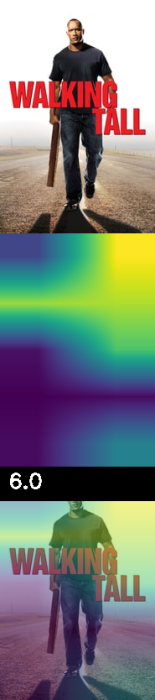

Predicted Value= 44.8667573928833


-1

In [ ]:
from google.colab.patches import cv2_imshow
# draw the predicted label on the output image
cv2.rectangle(output, (0, 0), (340, 40), (0, 0, 0), -1)
cv2.putText(output, label, (10, 25), cv2.FONT_HERSHEY_SIMPLEX,0.8, (255, 255, 255), 2)

# display the original image and resulting heatmap and output image
# to our screen
output = np.vstack([orig, heatmap, output])

output = imutils.resize(output, height=700)
cv2_imshow(output)
print('Predicted Value=',abs(preds[0][0]*maxvote))
cv2.waitKey(0)


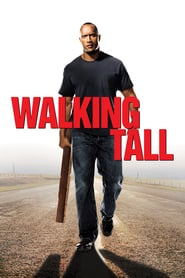

In [ ]:
##ORIGINAL IMAGE
from IPython.display import Image
display(Image(img7))

In [ ]:

def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(
    img_array, model, last_conv_layer_name, classifier_layer_names
):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer
    last_conv_layer = model.get_layer(last_conv_layer_name)
    last_conv_layer_model = keras.Model(model.inputs, last_conv_layer.output)

    # Second, we create a model that maps the activations of the last conv
    # layer to the final class predictions
    classifier_input = keras.Input(shape=last_conv_layer.output.shape[1:])
    x = classifier_input
    for layer_name in classifier_layer_names:
        x = model.get_layer(layer_name)(x)
    classifier_model = keras.Model(classifier_input, x)

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        # Compute activations of the last conv layer and make the tape watch it
        last_conv_layer_output = last_conv_layer_model(img_array)
        tape.watch(last_conv_layer_output)
        # Compute class predictions
        preds = classifier_model(last_conv_layer_output)
        top_pred_index = tf.argmax(preds[0])
        top_class_channel = preds[:, top_pred_index]

    # This is the gradient of the top predicted class with regard to
    # the output feature map of the last conv layer
    grads = tape.gradient(top_class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    last_conv_layer_output = last_conv_layer_output.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i in range(pooled_grads.shape[-1]):
        last_conv_layer_output[:, :, i] *= pooled_grads[i]

    # The channel-wise mean of the resulting feature map
    # is our heatmap of class activation
    heatmap = np.mean(last_conv_layer_output, axis=-1)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    return heatmap



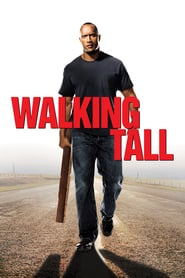

In [ ]:
import keras.applications
model_builder = keras.applications.xception.Xception
img_path=img7

img_size = (299, 299)
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions

last_conv_layer_name = "block14_sepconv2_act"
classifier_layer_names = [
    "avg_pool",
    "predictions",
]


display(Image(img_path))

Predicted: [('n04370456', 'sweatshirt', 0.245903)]


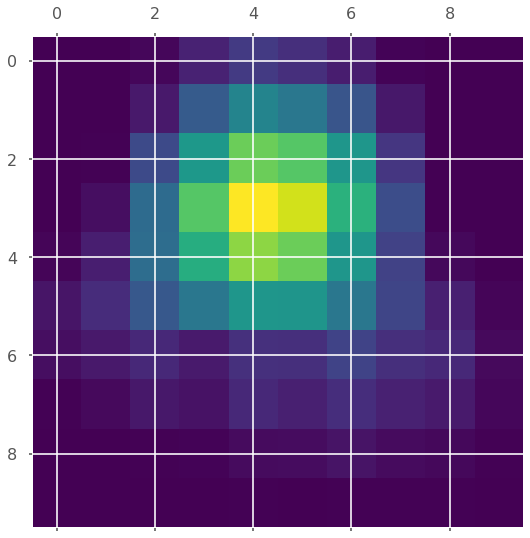

In [ ]:


img_array = preprocess_input(get_img_array(img_path, size=img_size))

# Make model
model = model_builder(weights="imagenet")
##model = imgonly_model

# Print what the top predicted class is
preds = model.predict(img_array)
print("Predicted:", decode_predictions(preds, top=1)[0])

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(
    img_array, model, last_conv_layer_name, classifier_layer_names
)

# Display heatmap
plt.matshow(heatmap)
plt.show()



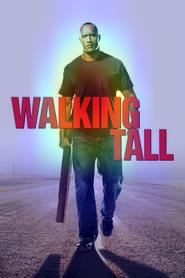

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# We load the original image
img = keras.preprocessing.image.load_img(img_path)
img = keras.preprocessing.image.img_to_array(img)

# We rescale heatmap to a range 0-255
heatmap = np.uint8(255 * heatmap)

# We use jet colormap to colorize heatmap
jet = cm.get_cmap("jet")

# We use RGB values of the colormap
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap]

# We create an image with RGB colorized heatmap
jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

# Superimpose the heatmap on original image
superimposed_img = jet_heatmap * 0.4 + img
superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

# Save the superimposed image
save_path = "elephant_cam.jpg"
superimposed_img.save(save_path)

# Display Grad CAM
display(Image(save_path))

**Adventure**

In [ ]:
val.loc[val['genre_list'] == 'Adventure']

Empty DataFrame
Columns: [Unnamed: 0, Unnamed: 0.1, Unnamed: 0.1.1, original_title, overview, id, genres, genre_list, vote_average, keywords, production_companies, cast, crew, poster_paths]
Index: []

In [ ]:
val[val['genre_list'].str.contains("Adventure")]

Unnamed: 0  ...                                       poster_paths
7             7  ...  /content/drive/My Drive/MovieContent/dataset/p...
20           20  ...  /content/drive/My Drive/MovieContent/dataset/p...
26           26  ...  /content/drive/My Drive/MovieContent/dataset/p...
34           34  ...  /content/drive/My Drive/MovieContent/dataset/p...
51           51  ...  /content/drive/My Drive/MovieContent/dataset/p...
58           58  ...  /content/drive/My Drive/MovieContent/dataset/p...
64           64  ...  /content/drive/My Drive/MovieContent/dataset/p...
66           66  ...  /content/drive/My Drive/MovieContent/dataset/p...
68           68  ...  /content/drive/My Drive/MovieContent/dataset/p...
70           70  ...  /content/drive/My Drive/MovieContent/dataset/p...
75           75  ...  /content/drive/My Drive/MovieContent/dataset/p...
85           85  ...  /content/drive/My Drive/MovieContent/dataset/p...
90           90  ...  /content/drive/My Drive/MovieContent/dataset/p...
98           98  ...  /content/drive/My Drive/MovieContent/dataset/p...
104         104  ...  /content/drive/My Drive/MovieContent/dataset/p...
108         108  ...  /content/drive/My Drive/MovieContent/dataset/p...
115         115  ...  /content/drive/My Drive/MovieContent/dataset/p...
131         131  ...  /content/drive/My Drive/MovieContent/dataset/p...
146         146  ...  /content/drive/My Drive/MovieContent/dataset/p...
149         149  ...  /content/drive/My Drive/MovieContent/dataset/p...
152         152  ...  /content/drive/My Drive/MovieContent/dataset/p...
155         155  ...  /content/drive/My Drive/MovieContent/dataset/p...
157         157  ...  /content/drive/My Drive/MovieContent/dataset/p...
160         160  ...  /content/drive/My Drive/MovieContent/dataset/p...
169         169  ...  /content/drive/My Drive/MovieContent/dataset/p...
171         171  ...  /content/drive/My Drive/MovieContent/dataset/p...
182         182  ...  /content/drive/My Drive/MovieContent/dataset/p...
190         190  ...  /content/drive/My Drive/MovieContent/dataset/p...
194         194  ...  /content/drive/My Drive/MovieContent/dataset/p...
196         196  ...  /content/drive/My Drive/MovieContent/dataset/p...
207         207  ...  /content/drive/My Drive/MovieContent/dataset/p...
227         227  ...  /content/drive/My Drive/MovieContent/dataset/p...
229         229  ...  /content/drive/My Drive/MovieContent/dataset/p...
232         232  ...  /content/drive/My Drive/MovieContent/dataset/p...
253         253  ...  /content/drive/My Drive/MovieContent/dataset/p...
255         255  ...  /content/drive/My Drive/MovieContent/dataset/p...
258         258  ...  /content/drive/My Drive/MovieContent/dataset/p...
262         262  ...  /content/drive/My Drive/MovieContent/dataset/p...
267         267  ...  /content/drive/My Drive/MovieContent/dataset/p...
270         270  ...  /content/drive/My Drive/MovieContent/dataset/p...
271         271  ...  /content/drive/My Drive/MovieContent/dataset/p...
284         284  ...  /content/drive/My Drive/MovieContent/dataset/p...
285         285  ...  /content/drive/My Drive/MovieContent/dataset/p...
286         286  ...  /content/drive/My Drive/MovieContent/dataset/p...
288         288  ...  /content/drive/My Drive/MovieContent/dataset/p...
289         289  ...  /content/drive/My Drive/MovieContent/dataset/p...
295         295  ...  /content/drive/My Drive/MovieContent/dataset/p...
299         299  ...  /content/drive/My Drive/MovieContent/dataset/p...
303         303  ...  /content/drive/My Drive/MovieContent/dataset/p...
307         307  ...  /content/drive/My Drive/MovieContent/dataset/p...
310         310  ...  /content/drive/My Drive/MovieContent/dataset/p...
313         313  ...  /content/drive/My Drive/MovieContent/dataset/p...
340         340  ...  /content/drive/My Drive/MovieContent/dataset/p...
346         346  ...  /content/drive/My Drive/MovieContent/dataset/p...
353         353  ...  /content/drive/My Drive

In [ ]:
MovieName='Ronin'
val.loc[val['original_title'] == MovieName]

Unnamed: 0  ...                                       poster_paths
227         227  ...  /content/drive/My Drive/MovieContent/dataset/p...

[1 rows x 14 columns]

In [ ]:
##val.poster_paths[358]
val.loc[val['original_title'] == MovieName].poster_paths


190    /content/drive/My Drive/MovieContent/dataset/p...
Name: poster_paths, dtype: object

In [ ]:
img7 = val.loc[val['original_title'] == MovieName]['poster_paths'].values[0]
print(img7)


/content/drive/My Drive/MovieContent/dataset/poster_folder/Ronin.jpg


In [ ]:
img7=img7 = val.loc[val['original_title'] == MovieName]['poster_paths'].values[0]

orig = cv2.imread(img7)
resized = cv2.resize(orig, (115, 75))

image = load_img(img7, target_size=(115, 75))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = imagenet_utils.preprocess_input(image)
print(image.shape)
preds = imgonly_model.predict(image)
i = np.argmax(preds[0])
print(i)

(1, 115, 75, 3)
0


In [ ]:
preds[0][0]

1.7711786

In [ ]:
val.loc[val['original_title'] == MovieName]

In [ ]:
label = val.loc[val['original_title'] == MovieName]['vote_average'].values[0].astype(str)
####val.loc[val['original_title'] == 'The Woman in Black.jpg'].vote_average.astype(str)
cam = GradCAM(imgonly_model, i)
heatmap = cam.compute_heatmap(image)


heatmap = cv2.resize(heatmap, (orig.shape[1], orig.shape[0]))
(heatmap, output) = cam.overlay_heatmap(heatmap, orig, alpha=0.5)


In [ ]:
##label='5.5'
print(label)
print(heatmap.shape)
print(output.shape)


6.7
(278, 185, 3)
(278, 185, 3)


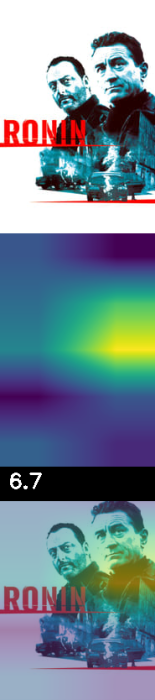

-1

In [ ]:
from google.colab.patches import cv2_imshow
# draw the predicted label on the output image
cv2.rectangle(output, (0, 0), (340, 40), (0, 0, 0), -1)
cv2.putText(output, label, (10, 25), cv2.FONT_HERSHEY_SIMPLEX,0.8, (255, 255, 255), 2)

# display the original image and resulting heatmap and output image
# to our screen
output = np.vstack([orig, heatmap, output])

output = imutils.resize(output, height=700)
cv2_imshow(output)
###print('Predicted Value=',abs(preds[0][0]))
cv2.waitKey(0)

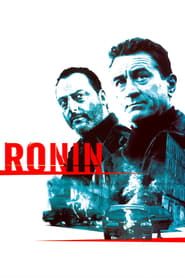

In [ ]:
import keras.applications
model_builder = keras.applications.xception.Xception
img_path=img7

img_size = (299, 299)
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions

last_conv_layer_name = "block14_sepconv2_act"
classifier_layer_names = [
    "avg_pool",
    "predictions",
]
display(Image(img_path))

Predicted: [('n06596364', 'comic_book', 0.15989195)]


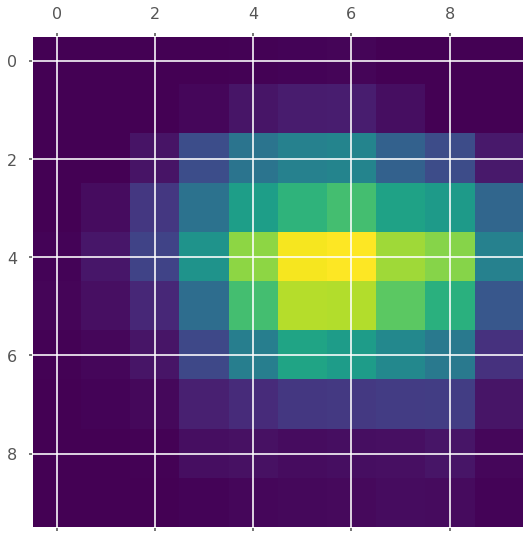

In [ ]:
img_array = preprocess_input(get_img_array(img_path, size=img_size))

# Make model
model = model_builder(weights="imagenet")
##model = imgonly_model

# Print what the top predicted class is
preds = model.predict(img_array)
print("Predicted:", decode_predictions(preds, top=1)[0])

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(
    img_array, model, last_conv_layer_name, classifier_layer_names
)

# Display heatmap
plt.matshow(heatmap)
plt.show()

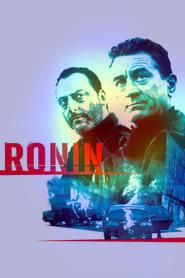

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# We load the original image
img = keras.preprocessing.image.load_img(img_path)
img = keras.preprocessing.image.img_to_array(img)

# We rescale heatmap to a range 0-255
heatmap = np.uint8(255 * heatmap)

# We use jet colormap to colorize heatmap
jet = cm.get_cmap("jet")

# We use RGB values of the colormap
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap]

# We create an image with RGB colorized heatmap
jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

# Superimpose the heatmap on original image
superimposed_img = jet_heatmap * 0.4 + img
superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

# Save the superimposed image
save_path = "elephant_cam.jpg"
superimposed_img.save(save_path)

# Display Grad CAM
display(Image(save_path))

**Drama**

In [ ]:
val.loc[val['genre_list'] == 'Drama']

Empty DataFrame
Columns: [Unnamed: 0, Unnamed: 0.1, Unnamed: 0.1.1, original_title, overview, id, genres, genre_list, vote_average, keywords, production_companies, cast, crew, poster_paths]
Index: []

In [ ]:
val[val['genre_list'].str.contains("Drama")]

Unnamed: 0  ...                                       poster_paths
0             0  ...  /content/drive/My Drive/MovieContent/dataset/p...
3             3  ...  /content/drive/My Drive/MovieContent/dataset/p...
4             4  ...  /content/drive/My Drive/MovieContent/dataset/p...
5             5  ...  /content/drive/My Drive/MovieContent/dataset/p...
8             8  ...  /content/drive/My Drive/MovieContent/dataset/p...
..          ...  ...                                                ...
362         362  ...  /content/drive/My Drive/MovieContent/dataset/p...
364         364  ...  /content/drive/My Drive/MovieContent/dataset/p...
366         366  ...  /content/drive/My Drive/MovieContent/dataset/p...
371         371  ...  /content/drive/My Drive/MovieContent/dataset/p...
373         373  ...  /content/drive/My Drive/MovieContent/dataset/p...

[185 rows x 14 columns]

In [ ]:
MovieName='The Woman in Black'
val.loc[val['original_title'] == MovieName]


Unnamed: 0  ...                                       poster_paths
3           3  ...  /content/drive/My Drive/MovieContent/dataset/p...

[1 rows x 14 columns]

In [ ]:
###img7="/content/drive/My Drive/MovieContent/dataset/poster_folder/The Woman in Black.jpg"  ###val.poster_paths[2]
img7=img7 = val.loc[val['original_title'] == MovieName]['poster_paths'].values[0]

orig = cv2.imread(img7)
resized = cv2.resize(orig, (115, 75))

image = load_img(img7, target_size=(115, 75))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = imagenet_utils.preprocess_input(image)
print(image.shape)
preds = imgonly_model.predict(image)
i = np.argmax(preds[0])
print(i)

(1, 115, 75, 3)
0


In [ ]:
label = val.loc[val['original_title'] == MovieName]['vote_average'].values[0].astype(str)
####val.loc[val['original_title'] == 'The Woman in Black.jpg'].vote_average.astype(str)
cam = GradCAM(imgonly_model, i)
heatmap = cam.compute_heatmap(image)


heatmap = cv2.resize(heatmap, (orig.shape[1], orig.shape[0]))
(heatmap, output) = cam.overlay_heatmap(heatmap, orig, alpha=0.5)


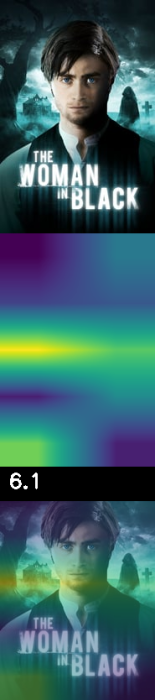

Predicted Value= 7.7671638


-1

In [ ]:
from google.colab.patches import cv2_imshow
# draw the predicted label on the output image
cv2.rectangle(output, (0, 0), (340, 40), (0, 0, 0), -1)
cv2.putText(output, label, (10, 25), cv2.FONT_HERSHEY_SIMPLEX,0.8, (255, 255, 255), 2)

# display the original image and resulting heatmap and output image
# to our screen
output = np.vstack([orig, heatmap, output])

output = imutils.resize(output, height=700)
cv2_imshow(output)
print('Predicted Value=',abs(preds[0][0]))
cv2.waitKey(0)

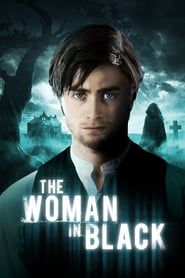

In [ ]:
import keras.applications
model_builder = keras.applications.xception.Xception
img_path=img7

img_size = (299, 299)
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions

last_conv_layer_name = "block14_sepconv2_act"
classifier_layer_names = [
    "avg_pool",
    "predictions",
]
display(Image(img_path))

Predicted: [('n07248320', 'book_jacket', 0.12518057)]


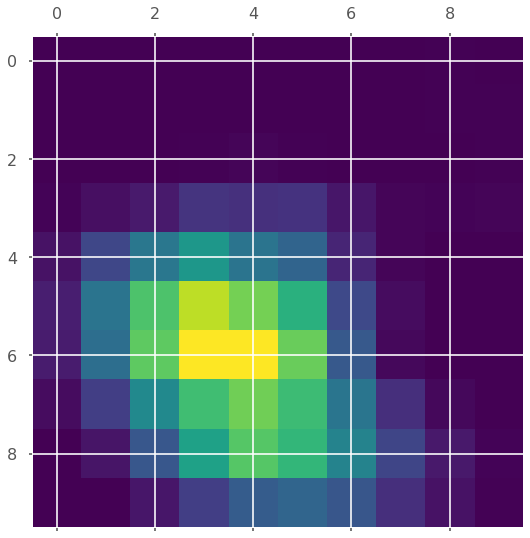

In [ ]:
img_array = preprocess_input(get_img_array(img_path, size=img_size))

# Make model
model = model_builder(weights="imagenet")
##model = imgonly_model

# Print what the top predicted class is
preds = model.predict(img_array)
print("Predicted:", decode_predictions(preds, top=1)[0])

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(
    img_array, model, last_conv_layer_name, classifier_layer_names
)

# Display heatmap
plt.matshow(heatmap)
plt.show()

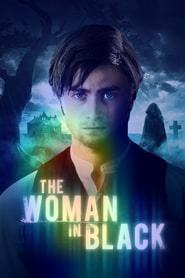

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# We load the original image
img = keras.preprocessing.image.load_img(img_path)
img = keras.preprocessing.image.img_to_array(img)

# We rescale heatmap to a range 0-255
heatmap = np.uint8(255 * heatmap)

# We use jet colormap to colorize heatmap
jet = cm.get_cmap("jet")

# We use RGB values of the colormap
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap]

# We create an image with RGB colorized heatmap
jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

# Superimpose the heatmap on original image
superimposed_img = jet_heatmap * 0.4 + img
superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

# Save the superimposed image
save_path = "elephant_cam.jpg"
superimposed_img.save(save_path)

# Display Grad CAM
display(Image(save_path))

**Horror**

In [ ]:
val[val['genre_list'].str.contains("Horror")]

Unnamed: 0  ...                                       poster_paths
1             1  ...  /content/drive/My Drive/MovieContent/dataset/p...
3             3  ...  /content/drive/My Drive/MovieContent/dataset/p...
6             6  ...  /content/drive/My Drive/MovieContent/dataset/p...
10           10  ...  /content/drive/My Drive/MovieContent/dataset/p...
14           14  ...  /content/drive/My Drive/MovieContent/dataset/p...
31           31  ...  /content/drive/My Drive/MovieContent/dataset/p...
32           32  ...  /content/drive/My Drive/MovieContent/dataset/p...
47           47  ...  /content/drive/My Drive/MovieContent/dataset/p...
48           48  ...  /content/drive/My Drive/MovieContent/dataset/p...
50           50  ...  /content/drive/My Drive/MovieContent/dataset/p...
51           51  ...  /content/drive/My Drive/MovieContent/dataset/p...
55           55  ...  /content/drive/My Drive/MovieContent/dataset/p...
57           57  ...  /content/drive/My Drive/MovieContent/dataset/p...
69           69  ...  /content/drive/My Drive/MovieContent/dataset/p...
72           72  ...  /content/drive/My Drive/MovieContent/dataset/p...
91           91  ...  /content/drive/My Drive/MovieContent/dataset/p...
93           93  ...  /content/drive/My Drive/MovieContent/dataset/p...
96           96  ...  /content/drive/My Drive/MovieContent/dataset/p...
97           97  ...  /content/drive/My Drive/MovieContent/dataset/p...
100         100  ...  /content/drive/My Drive/MovieContent/dataset/p...
106         106  ...  /content/drive/My Drive/MovieContent/dataset/p...
109         109  ...  /content/drive/My Drive/MovieContent/dataset/p...
123         123  ...  /content/drive/My Drive/MovieContent/dataset/p...
129         129  ...  /content/drive/My Drive/MovieContent/dataset/p...
139         139  ...  /content/drive/My Drive/MovieContent/dataset/p...
143         143  ...  /content/drive/My Drive/MovieContent/dataset/p...
189         189  ...  /content/drive/My Drive/MovieContent/dataset/p...
195         195  ...  /content/drive/My Drive/MovieContent/dataset/p...
219         219  ...  /content/drive/My Drive/MovieContent/dataset/p...
244         244  ...  /content/drive/My Drive/MovieContent/dataset/p...
245         245  ...  /content/drive/My Drive/MovieContent/dataset/p...
247         247  ...  /content/drive/My Drive/MovieContent/dataset/p...
248         248  ...  /content/drive/My Drive/MovieContent/dataset/p...
251         251  ...  /content/drive/My Drive/MovieContent/dataset/p...
259         259  ...  /content/drive/My Drive/MovieContent/dataset/p...
267         267  ...  /content/drive/My Drive/MovieContent/dataset/p...
268         268  ...  /content/drive/My Drive/MovieContent/dataset/p...
274         274  ...  /content/drive/My Drive/MovieContent/dataset/p...
295         295  ...  /content/drive/My Drive/MovieContent/dataset/p...
296         296  ...  /content/drive/My Drive/MovieContent/dataset/p...
304         304  ...  /content/drive/My Drive/MovieContent/dataset/p...
316         316  ...  /content/drive/My Drive/MovieContent/dataset/p...
325         325  ...  /content/drive/My Drive/MovieContent/dataset/p...
329         329  ...  /content/drive/My Drive/MovieContent/dataset/p...
332         332  ...  /content/drive/My Drive/MovieContent/dataset/p...
334         334  ...  /content/drive/My Drive/MovieContent/dataset/p...
337         337  ...  /content/drive/My Drive/MovieContent/dataset/p...
349         349  ...  /content/drive/My Drive/MovieContent/dataset/p...
360         360  ...  /content/drive/My Drive/MovieContent/dataset/p...
361         361  ...  /content/drive/My Drive/MovieContent/dataset/p...
363         363  ...  /content/drive/My Drive/MovieContent/dataset/p...
365         365  ...  /content/drive/My Drive/MovieContent/dataset/p...

[52 rows x 14 columns]

In [ ]:
MovieName='Valentine'
val.loc[val['original_title'] == MovieName]


##val.poster_paths[358]
val.loc[val['original_title'] == MovieName].poster_paths

268    /content/drive/My Drive/MovieContent/dataset/p...
Name: poster_paths, dtype: object

In [ ]:
img7=img7 = val.loc[val['original_title'] == MovieName]['poster_paths'].values[0]

orig = cv2.imread(img7)
resized = cv2.resize(orig, (115, 75))

image = load_img(img7, target_size=(115, 75))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = imagenet_utils.preprocess_input(image)
print(image.shape)
preds = imgonly_model.predict(image)
i = np.argmax(preds[0])
print(i)

(1, 115, 75, 3)
0


In [ ]:
label = val.loc[val['original_title'] == MovieName]['vote_average'].values[0].astype(str)
####val.loc[val['original_title'] == 'The Woman in Black.jpg'].vote_average.astype(str)
cam = GradCAM(imgonly_model, i)
heatmap = cam.compute_heatmap(image)


heatmap = cv2.resize(heatmap, (orig.shape[1], orig.shape[0]))
(heatmap, output) = cam.overlay_heatmap(heatmap, orig, alpha=0.5)



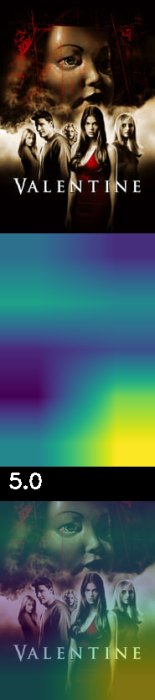

Predicted Value= 10.268362


-1

In [ ]:
from google.colab.patches import cv2_imshow
# draw the predicted label on the output image
cv2.rectangle(output, (0, 0), (340, 40), (0, 0, 0), -1)
cv2.putText(output, label, (10, 25), cv2.FONT_HERSHEY_SIMPLEX,0.8, (255, 255, 255), 2)

# display the original image and resulting heatmap and output image
# to our screen
output = np.vstack([orig, heatmap, output])

output = imutils.resize(output, height=700)
cv2_imshow(output)
print('Predicted Value=',abs(preds[0][0]))
cv2.waitKey(0)




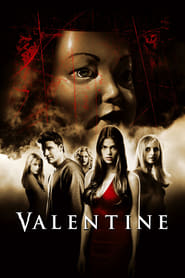

In [ ]:
import keras.applications
model_builder = keras.applications.xception.Xception
img_path=img7

img_size = (299, 299)
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions

last_conv_layer_name = "block14_sepconv2_act"
classifier_layer_names = [
    "avg_pool",
    "predictions",
]
display(Image(img_path))

Predicted: [('n04418357', 'theater_curtain', 0.51983684)]


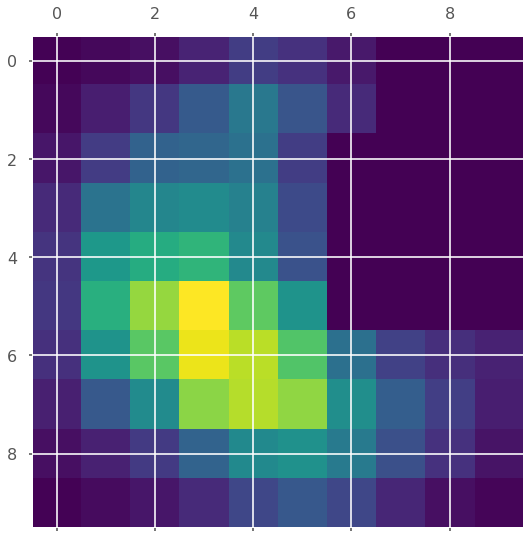

In [ ]:
img_array = preprocess_input(get_img_array(img_path, size=img_size))

# Make model
model = model_builder(weights="imagenet")
##model = imgonly_model

# Print what the top predicted class is
preds = model.predict(img_array)
print("Predicted:", decode_predictions(preds, top=1)[0])

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(
    img_array, model, last_conv_layer_name, classifier_layer_names
)

# Display heatmap
plt.matshow(heatmap)
plt.show()

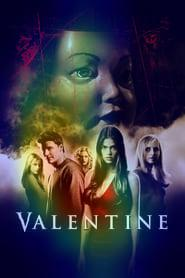

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# We load the original image
img = keras.preprocessing.image.load_img(img_path)
img = keras.preprocessing.image.img_to_array(img)

# We rescale heatmap to a range 0-255
heatmap = np.uint8(255 * heatmap)

# We use jet colormap to colorize heatmap
jet = cm.get_cmap("jet")

# We use RGB values of the colormap
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap]

# We create an image with RGB colorized heatmap
jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

# Superimpose the heatmap on original image
superimposed_img = jet_heatmap * 0.4 + img
superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

# Save the superimposed image
save_path = "elephant_cam.jpg"
superimposed_img.save(save_path)

# Display Grad CAM
display(Image(save_path))

**War**

In [ ]:
val[val['genre_list'].str.contains("War")]

Unnamed: 0  ...                                       poster_paths
34           34  ...  /content/drive/My Drive/MovieContent/dataset/p...
68           68  ...  /content/drive/My Drive/MovieContent/dataset/p...
85           85  ...  /content/drive/My Drive/MovieContent/dataset/p...
125         125  ...  /content/drive/My Drive/MovieContent/dataset/p...
127         127  ...  /content/drive/My Drive/MovieContent/dataset/p...
147         147  ...  /content/drive/My Drive/MovieContent/dataset/p...
151         151  ...  /content/drive/My Drive/MovieContent/dataset/p...
152         152  ...  /content/drive/My Drive/MovieContent/dataset/p...
171         171  ...  /content/drive/My Drive/MovieContent/dataset/p...
173         173  ...  /content/drive/My Drive/MovieContent/dataset/p...
260         260  ...  /content/drive/My Drive/MovieContent/dataset/p...

[11 rows x 14 columns]

In [ ]:
MovieName='Enemy at the Gates'
val.loc[val['original_title'] == MovieName]

Unnamed: 0  ...                                       poster_paths
151         151  ...  /content/drive/My Drive/MovieContent/dataset/p...

[1 rows x 14 columns]

In [ ]:
img7=img7 = val.loc[val['original_title'] == MovieName]['poster_paths'].values[0]

orig = cv2.imread(img7)
resized = cv2.resize(orig, (115, 75))

image = load_img(img7, target_size=(115, 75))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = imagenet_utils.preprocess_input(image)
print(image.shape)
preds = imgonly_model.predict(image)
i = np.argmax(preds[0])
print(i)

(1, 115, 75, 3)
0


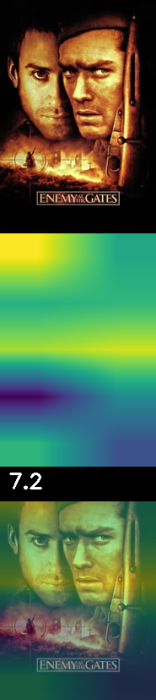

Predicted Value= 17.607925


-1

In [ ]:
label = val.loc[val['original_title'] == MovieName]['vote_average'].values[0].astype(str)
####val.loc[val['original_title'] == 'The Woman in Black.jpg'].vote_average.astype(str)
cam = GradCAM(imgonly_model, i)
heatmap = cam.compute_heatmap(image)
heatmap = cv2.resize(heatmap, (orig.shape[1], orig.shape[0]))
(heatmap, output) = cam.overlay_heatmap(heatmap, orig, alpha=0.5)

from google.colab.patches import cv2_imshow
# draw the predicted label on the output image
cv2.rectangle(output, (0, 0), (340, 40), (0, 0, 0), -1)
cv2.putText(output, label, (10, 25), cv2.FONT_HERSHEY_SIMPLEX,0.8, (255, 255, 255), 2)

# display the original image and resulting heatmap and output image
# to our screen
output = np.vstack([orig, heatmap, output])

output = imutils.resize(output, height=700)
cv2_imshow(output)
print('Predicted Value=',abs(preds[0][0]))
cv2.waitKey(0)

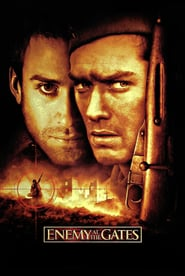

In [ ]:
import keras.applications
model_builder = keras.applications.xception.Xception
img_path=img7

img_size = (299, 299)
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions

last_conv_layer_name = "block14_sepconv2_act"
classifier_layer_names = [
    "avg_pool",
    "predictions",
]
display(Image(img_path))

Predicted: [('n07248320', 'book_jacket', 0.1276262)]


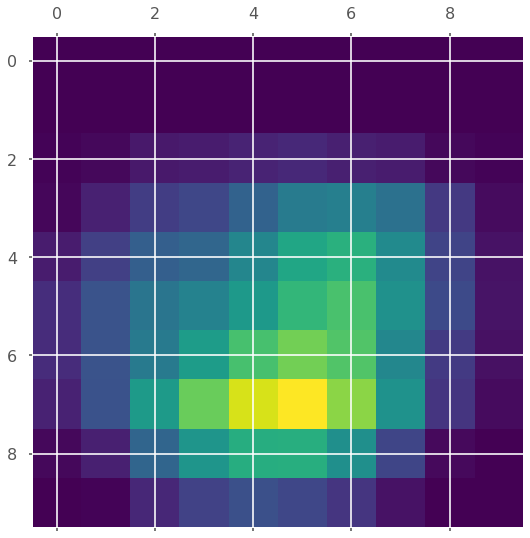

In [ ]:
img_array = preprocess_input(get_img_array(img_path, size=img_size))

# Make model
model = model_builder(weights="imagenet")
##model = imgonly_model

# Print what the top predicted class is
preds = model.predict(img_array)
print("Predicted:", decode_predictions(preds, top=1)[0])

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(
    img_array, model, last_conv_layer_name, classifier_layer_names
)

# Display heatmap
plt.matshow(heatmap)
plt.show()

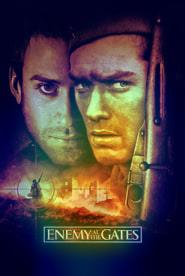

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# We load the original image
img = keras.preprocessing.image.load_img(img_path)
img = keras.preprocessing.image.img_to_array(img)

# We rescale heatmap to a range 0-255
heatmap = np.uint8(255 * heatmap)

# We use jet colormap to colorize heatmap
jet = cm.get_cmap("jet")

# We use RGB values of the colormap
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap]

# We create an image with RGB colorized heatmap
jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

# Superimpose the heatmap on original image
superimposed_img = jet_heatmap * 0.4 + img
superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

# Save the superimposed image
save_path = "elephant_cam.jpg"
superimposed_img.save(save_path)

# Display Grad CAM
display(Image(save_path))

**Romance**

In [ ]:
val[val['genre_list'].str.contains("Romance")]

Unnamed: 0  ...                                       poster_paths
5             5  ...  /content/drive/My Drive/MovieContent/dataset/p...
16           16  ...  /content/drive/My Drive/MovieContent/dataset/p...
22           22  ...  /content/drive/My Drive/MovieContent/dataset/p...
24           24  ...  /content/drive/My Drive/MovieContent/dataset/p...
28           28  ...  /content/drive/My Drive/MovieContent/dataset/p...
..          ...  ...                                                ...
338         338  ...  /content/drive/My Drive/MovieContent/dataset/p...
341         341  ...  /content/drive/My Drive/MovieContent/dataset/p...
345         345  ...  /content/drive/My Drive/MovieContent/dataset/p...
350         350  ...  /content/drive/My Drive/MovieContent/dataset/p...
367         367  ...  /content/drive/My Drive/MovieContent/dataset/p...

[65 rows x 14 columns]

In [ ]:
MovieName='The 40 Year Old Virgin'
val.loc[val['original_title'] == MovieName]

Unnamed: 0  ...                                       poster_paths
24          24  ...  /content/drive/My Drive/MovieContent/dataset/p...

[1 rows x 14 columns]

In [ ]:
img7=img7 = val.loc[val['original_title'] == MovieName]['poster_paths'].values[0]

orig = cv2.imread(img7)
resized = cv2.resize(orig, (115, 75))

image = load_img(img7, target_size=(115, 75))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = imagenet_utils.preprocess_input(image)
print(image.shape)
preds = imgonly_model.predict(image)
i = np.argmax(preds[0])
print(i)

(1, 115, 75, 3)
0


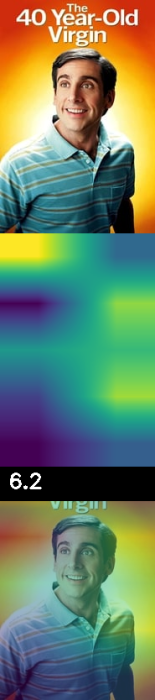

Predicted Value= 5.8710523


-1

In [ ]:
label = val.loc[val['original_title'] == MovieName]['vote_average'].values[0].astype(str)
####val.loc[val['original_title'] == 'The Woman in Black.jpg'].vote_average.astype(str)
cam = GradCAM(imgonly_model, i)
heatmap = cam.compute_heatmap(image)
heatmap = cv2.resize(heatmap, (orig.shape[1], orig.shape[0]))
(heatmap, output) = cam.overlay_heatmap(heatmap, orig, alpha=0.5)

from google.colab.patches import cv2_imshow
# draw the predicted label on the output image
cv2.rectangle(output, (0, 0), (340, 40), (0, 0, 0), -1)
cv2.putText(output, label, (10, 25), cv2.FONT_HERSHEY_SIMPLEX,0.8, (255, 255, 255), 2)

# display the original image and resulting heatmap and output image
# to our screen
output = np.vstack([orig, heatmap, output])

output = imutils.resize(output, height=700)
cv2_imshow(output)
print('Predicted Value=',abs(preds[0][0]))
cv2.waitKey(0)

Predicted: [('n06359193', 'web_site', 0.04183102)]


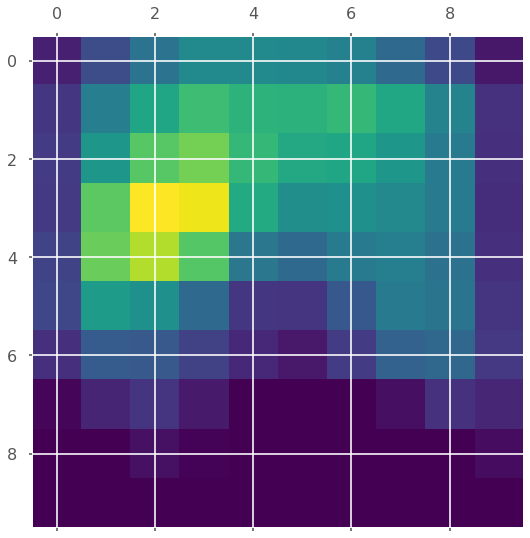

In [ ]:
import keras.applications
model_builder = keras.applications.xception.Xception
img_path=img7

img_size = (299, 299)
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions

last_conv_layer_name = "block14_sepconv2_act"
classifier_layer_names = [
    "avg_pool",
    "predictions",
]
##display(Image(img_path))

img_array = preprocess_input(get_img_array(img_path, size=img_size))

# Make model
model = model_builder(weights="imagenet")
##model = imgonly_model

# Print what the top predicted class is
preds = model.predict(img_array)
print("Predicted:", decode_predictions(preds, top=1)[0])

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(
    img_array, model, last_conv_layer_name, classifier_layer_names
)

# Display heatmap
plt.matshow(heatmap)
plt.show()

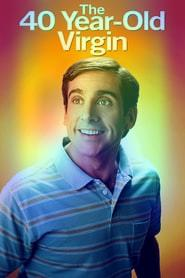

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# We load the original image
img = keras.preprocessing.image.load_img(img_path)
img = keras.preprocessing.image.img_to_array(img)

# We rescale heatmap to a range 0-255
heatmap = np.uint8(255 * heatmap)

# We use jet colormap to colorize heatmap
jet = cm.get_cmap("jet")

# We use RGB values of the colormap
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap]

# We create an image with RGB colorized heatmap
jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

# Superimpose the heatmap on original image
superimposed_img = jet_heatmap * 0.4 + img
superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

# Save the superimposed image
save_path = "elephant_cam.jpg"
superimposed_img.save(save_path)

# Display Grad CAM
display(Image(save_path))

In [ ]:
model.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_10[0][0]                   
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

###**VGG16 MODEL**

In [ ]:
###import training images normalized
with open('/content/drive/My Drive/MovieContent/train_np_imgs_norm_vgg16','rb') as f: X_img_train_vgg = pickle.load(f)
X_img_train_vgg.shape 

(3357, 1, 7, 7, 512)

In [ ]:
with open('/content/drive/My Drive/MovieContent/test_np_imgs_norm_vgg16', 'rb') as f: X_img_test_vgg = pickle.load(f)
X_img_test_vgg.shape

(932, 1, 7, 7, 512)

In [ ]:
with open('/content/drive/My Drive/MovieContent/val_np_img_norm_vgg16', 'rb') as f: X_img_val_vgg = pickle.load(f)
X_img_val_vgg.shape

(374, 1, 7, 7, 512)

In [ ]:
(a,b,c,d)=X_img_train_vgg[0].shape
X_img_train_feature_size=a*b*c*d
X_img_train_feature_size

25088

In [ ]:
train_img_features=np.zeros((len(X_img_train_vgg),X_img_train_feature_size))
for i in range(len(X_img_train_vgg)):
    feat=X_img_train_vgg[i]
    reshaped_feat=feat.reshape(1,-1)
    train_img_features[i]=reshaped_feat

In [ ]:
X_img_train_vgg16=train_img_features

In [ ]:
X_img_train_vgg16.shape

(3357, 25088)

In [ ]:
(a,b,c,d)=X_img_test_vgg[0].shape
X_img_test_feature_size=a*b*c*d
print(X_img_test_feature_size)
test_img_features=np.zeros((len(X_img_test_vgg),X_img_test_feature_size))
for i in range(len(X_img_test_vgg)):
    feat=X_img_test_vgg[i]
    reshaped_feat=feat.reshape(1,-1)
    test_img_features[i]=reshaped_feat

25088


In [ ]:
X_img_test_vgg16=test_img_features

In [ ]:
X_img_test_vgg16.shape

(932, 25088)

In [ ]:
(a,b,c,d)=X_img_val_vgg[0].shape
X_img_val_feature_size=a*b*c*d
print(X_img_val_feature_size)
val_img_features=np.zeros((len(X_img_val_vgg),X_img_val_feature_size))
for i in range(len(X_img_val_vgg)):
    feat=X_img_val_vgg[i]
    reshaped_feat=feat.reshape(1,-1)
    val_img_features[i]=reshaped_feat

25088


In [ ]:
X_img_val_vgg16=val_img_features

In [ ]:
X_img_val_vgg16.shape

(374, 25088)

In [ ]:
print(train_labels.shape)
print(test_labels.shape)
print(val_labels.shape)

(3351,)
(931,)
(373,)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout,BatchNormalization
from keras import optimizers
imgonly_model_vgg16 = Sequential([
    Dense(1024, input_shape=(25088,)),
    Activation('relu'),
    Dense(256),
    Activation('relu'),
    Dense(1),
    Activation('linear'),
])
opt = optimizers.RMSprop(lr=0.0001, decay=1e-6)
adm = optimizers.Adam(lr=0.001, decay=1e-5)
sgd = optimizers.SGD(lr=0.05, decay=1e-6, momentum=0.4, nesterov=False)
imgonly_model_vgg16.compile(optimizer=adm,
              loss='mean_absolute_percentage_error',
              metrics=['mae', 'mse'])
'''
mean_absolute_error =  0.08029401599596245
mean_squared_error  =  0.010634521208350697
r2_score            =  -0.018794895697080483
'''

'\nmean_absolute_error =  0.08029401599596245\nmean_squared_error  =  0.010634521208350697\nr2_score            =  -0.018794895697080483\n'

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout,BatchNormalization
from keras import optimizers
imgonly_model_vgg16 = Sequential([
    Dense(1024, input_shape=(25088,)),
    Activation('relu'),
    Dense(256),
    Activation('relu'),
    Dense(1),
    Activation('linear'),
])
opt = optimizers.RMSprop(lr=0.0001, decay=1e-6)
adm = optimizers.Adam(lr=0.00001, decay=1e-5)
sgd = optimizers.SGD(lr=0.05, decay=1e-6, momentum=0.4, nesterov=False)
imgonly_model_vgg16.compile(optimizer=adm,
              loss='mean_absolute_percentage_error',
              metrics=['mae', 'mse'])
'''
mean_absolute_error =  0.08029401599596245
mean_absolute_error =  0.08878329364374184
mean_squared_error  =  0.013650352073390172
r2_score            =  -0.30771369433328544
'''

'\nmean_absolute_error =  0.08029401599596245\nmean_squared_error  =  0.010634521208350697\nr2_score            =  -0.018794895697080483\n'

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout,BatchNormalization
from keras import optimizers
imgonly_model_vgg16 = Sequential([
    Dense(1024, input_shape=(25088,)),
    Activation('relu'),
    Dense(256),
    Activation('relu'),
    Dense(1),
    Activation('softmax'),
])
opt = optimizers.RMSprop(lr=0.0001, decay=1e-6)
adm = optimizers.Adam(lr=0.001, decay=1e-5)
sgd = optimizers.SGD(lr=0.05, decay=1e-6, momentum=0.4, nesterov=False)
imgonly_model_vgg16.compile(optimizer=adm,
              loss='mean_absolute_percentage_error',
              metrics=['mae', 'mse'])

'''
mean_absolute_error =  0.33313154025771863
mean_squared_error  =  0.12141495692756252
r2_score            =  -10.631641514988868
'''

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout,BatchNormalization
from keras import optimizers
imgonly_model_vgg16 = Sequential([
    Dense(1024, input_shape=(25088,)),
    Activation('relu'),
    Dense(256),
    Activation('relu'),
    Dense(128),
    Activation('relu'),
    Dense(64),
    Activation('relu'),    
    Dense(32),
    Activation('relu'),    
    Dense(1),
    Activation('linear'),
])
opt = optimizers.RMSprop(lr=0.0001, decay=1e-6)
adm = optimizers.Adam(lr=0.001, decay=1e-5)
sgd = optimizers.SGD(lr=0.05, decay=1e-6, momentum=0.4, nesterov=False)
imgonly_model_vgg16.compile(optimizer=adm,
              loss='mean_absolute_percentage_error',
              metrics=['mae', 'mse'])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout,BatchNormalization
from keras import optimizers
imgonly_model_vgg16 = Sequential([
    Dense(1024, input_shape=(25088,)),
    Activation('relu'),
    Dense(256),
    Activation('relu'),
    Dense(128),
    Activation('relu'),
    Dense(64),
    Activation('relu'),    
    Dense(32),
    Activation('relu'),    
    Dense(1),
    Activation('linear'),
])
opt = optimizers.RMSprop(lr=0.0001, decay=1e-6)
adm = optimizers.Adam(lr=0.001, decay=1e-5)
sgd = optimizers.SGD(lr=0.05, decay=1e-6, momentum=0.4, nesterov=False)
imgonly_model_vgg16.compile(optimizer=adm,
              loss='mean_absolute_percentage_error',
              metrics=['mae', 'mse'])
'''
mean_absolute_error =  0.08187286031225909
mean_squared_error  =  0.010647117128212624
r2_score            =  -0.02000159401574675
'''

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout,BatchNormalization
from keras import optimizers
imgonly_model_vgg16 = Sequential([
    Dense(1024, input_shape=(25088,)),
    Activation('relu'),
    Dense(512),
    Activation('relu'),
    Dense(256),
    Activation('relu'),    
    Dense(128),
    Activation('relu'),
    Dense(64),
    Activation('relu'),    
    Dense(32),
    Activation('relu'),    
    Dense(1),
    Activation('linear'),
])
opt = optimizers.RMSprop(lr=0.0001, decay=1e-6)
adm = optimizers.Adam(lr=0.001, decay=1e-5)
sgd = optimizers.SGD(lr=0.05, decay=1e-6, momentum=0.4, nesterov=False)
imgonly_model_vgg16.compile(optimizer=adm,
              loss='mean_absolute_percentage_error',
              metrics=['mae', 'mse'])
'''
mean_absolute_error =  0.0824275571077451
mean_squared_error  =  0.010750109111738472
r2_score            =  -0.029868301228804794
'''

'\nmean_absolute_error =  0.08187286031225909\nmean_squared_error  =  0.010647117128212624\nr2_score            =  -0.02000159401574675\n'

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout,BatchNormalization
from keras import optimizers
imgonly_model_vgg16 = Sequential([
    Dense(1024, input_shape=(25088,)),
    Activation('relu'),
    Dense(512),
    Activation('relu'),
    Dense(256),
    Activation('relu'),    
    Dense(128),
    Activation('relu'),
    Dense(64),
    Activation('relu'),    
    Dense(32),
    Activation('relu'),    
    Dense(16),
    Activation('relu'),        
    Dense(8),
    Activation('relu'),        
    Dense(4),
    Activation('relu'),        
    Dense(1),
    Activation('linear'),
])
opt = optimizers.RMSprop(lr=0.0001, decay=1e-6)
adm = optimizers.Adam(lr=0.001, decay=1e-5)
sgd = optimizers.SGD(lr=0.05, decay=1e-6, momentum=0.4, nesterov=False)
imgonly_model_vgg16.compile(optimizer=adm,
              loss='mean_absolute_percentage_error',
              metrics=['mae', 'mse'])
'''
mean_absolute_error =  0.08707245695590626
mean_squared_error  =  0.011556179187114725
r2_score            =  -0.10709040293683736
'''

'\nmean_absolute_error =  0.0824275571077451\nmean_squared_error  =  0.010750109111738472\nr2_score            =  -0.029868301228804794\n'

In [ ]:
ImageONLY_model_vgg16 = imgonly_model_vgg16.fit([X_img_train_vgg16], train_labels, 
                                                batch_size=64, 
                                                epochs=100,
                                                validation_data=([X_img_test_vgg16], test_labels))
                                                ###callbacks = [es, csv_logger, check_point])

Epoch 1/100
53/53 [==============================] - 1s 11ms/step - loss: 493.9071 - mae: 2.9547 - mse: 32.4737 - val_loss: 29.1077 - val_mae: 0.1476 - val_mse: 0.0319
Epoch 2/100
53/53 [==============================] - 0s 8ms/step - loss: 43.8421 - mae: 0.2615 - mse: 0.0995 - val_loss: 52.9059 - val_mae: 0.3313 - val_mse: 0.1196
Epoch 3/100
53/53 [==============================] - 0s 8ms/step - loss: 31.3811 - mae: 0.1883 - mse: 0.0489 - val_loss: 25.9773 - val_mae: 0.1600 - val_mse: 0.0324
Epoch 4/100
53/53 [==============================] - 0s 8ms/step - loss: 20.5156 - mae: 0.1209 - mse: 0.0233 - val_loss: 15.3347 - val_mae: 0.0750 - val_mse: 0.0097
Epoch 5/100
53/53 [==============================] - 0s 8ms/step - loss: 21.5532 - mae: 0.1271 - mse: 0.0235 - val_loss: 15.5943 - val_mae: 0.0862 - val_mse: 0.0116
Epoch 6/100
53/53 [==============================] - 0s 8ms/step - loss: 15.3316 - mae: 0.0884 - mse: 0.0128 - val_loss: 27.1819 - val_mae: 0.1679 - val_mse: 0.0348
Epoch 7

In [ ]:
print("[INFO] predicting avg votes...")
preds = imgonly_model_vgg16.predict([X_img_val_vgg16])
print("[INFO] predicting avg votes...COMPLETED")


[INFO] predicting avg votes...
[INFO] predicting avg votes...COMPLETED


In [ ]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
print('mean_absolute_error = ',mean_absolute_error(val_labels, preds))
print('mean_squared_error  = ',mean_squared_error(val_labels, preds))
print('r2_score            = ',r2_score(val_labels, preds))	

mean_absolute_error =  0.08059770461709741
mean_squared_error  =  0.010579755170846946
r2_score            =  -0.08874167749683237


In [ ]:
import cv2

from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
import pickle
model = VGG16(weights='imagenet', include_top=False)


class GradCAM:
	def __init__(self, model, classIdx, layerName=None):
		# store the model, the class index used to measure the class
		# activation map, and the layer to be used when visualizing
		# the class activation map
		self.model = model
		self.classIdx = classIdx
		self.layerName = layerName

		# if the layer name is None, attempt to automatically find
		# the target output layer
		if self.layerName is None:
			self.layerName = self.find_target_layer()

	def find_target_layer(self):
		# attempt to find the final convolutional layer in the network
		# by looping over the layers of the network in reverse order
		for layer in reversed(self.model.layers):
			# check to see if the layer has a 4D output
			if len(layer.output_shape) == 2:
				return layer.name

		# otherwise, we could not find a 4D layer so the GradCAM
		# algorithm cannot be applied
		raise ValueError("Could not find 4D layer. Cannot apply GradCAM.")

	def compute_heatmap(self, image, eps=1e-8):
		# construct our gradient model by supplying (1) the inputs
		# to our pre-trained model, (2) the output of the (presumably)
		# final 4D layer in the network, and (3) the output of the
		# softmax activations from the model
		gradModel = Model(
			inputs=[self.model.inputs],
			outputs=[self.model.get_layer(self.layerName).output, 
				self.model.output])

		# record operations for automatic differentiation
		with tf.GradientTape() as tape:
			# cast the image tensor to a float-32 data type, pass the
			# image through the gradient model, and grab the loss
			# associated with the specific class index
			inputs = tf.cast(image, tf.float32)
			(convOutputs, predictions) = gradModel(inputs)
			loss = predictions[:, self.classIdx]

		# use automatic differentiation to compute the gradients
		grads = tape.gradient(loss, convOutputs)

		# compute the guided gradients
		castConvOutputs = tf.cast(convOutputs > 0, "float32")
		castGrads = tf.cast(grads > 0, "float32")
		guidedGrads = castConvOutputs * castGrads * grads

		# the convolution and guided gradients have a batch dimension
		# (which we don't need) so let's grab the volume itself and
		# discard the batch
		convOutputs = convOutputs[0]
		guidedGrads = guidedGrads[0]

		# compute the average of the gradient values, and using them
		# as weights, compute the ponderation of the filters with
		# respect to the weights
		weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
		cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)

		# grab the spatial dimensions of the input image and resize
		# the output class activation map to match the input image
		# dimensions
		(w, h) = (image.shape[2], image.shape[1])
		heatmap = cv2.resize(cam.numpy(), (w, h))

		# normalize the heatmap such that all values lie in the range
		# [0, 1], scale the resulting values to the range [0, 255],
		# and then convert to an unsigned 8-bit integer
		numer = heatmap - np.min(heatmap)
		denom = (heatmap.max() - heatmap.min()) + eps
		heatmap = numer / denom
		heatmap = (heatmap * 255).astype("uint8")

		# return the resulting heatmap to the calling function
		return heatmap

	def overlay_heatmap(self, heatmap, image, alpha=0.5,
		colormap=cv2.COLORMAP_VIRIDIS):
		# apply the supplied color map to the heatmap and then
		# overlay the heatmap on the input image
		heatmap = cv2.applyColorMap(heatmap, colormap)
		output = cv2.addWeighted(image, alpha, heatmap, 1 - alpha, 0)

		# return a 2-tuple of the color mapped heatmap and the output,
		# overlaid image
		return (heatmap, output)

In [ ]:
train_vgg16 = pd.read_csv("/content/drive/My Drive/MovieContent/train_data_224X224.csv")
test_vgg16  = pd.read_csv("/content/drive/My Drive/MovieContent/test_data_224X224.csv")
val_vgg16   = pd.read_csv("/content/drive/My Drive/MovieContent/val_data_224X224.csv")

In [ ]:
val_vgg16.poster_paths[2]

'/content/drive/My Drive/MovieContent/dataset/poster_folder_224X224/poster_folder/Rise of the Guardians.jpg'

In [ ]:
###TEST IMAGE
img7= "/content/drive/My Drive/MovieContent/dataset/poster_folder_224X224/poster_folder/Rise of the Guardians.jpg" ###val_vgg16.poster_paths[2] 

In [ ]:
orig = cv2.imread(img7)
resized = cv2.resize(orig, (224, 224))

imgage = cv2.imread(img7)
imgage = cv2.resize(imgage, (224, 224))
imgage = imgage.astype(np.float32)/255

imgage = image.img_to_array(imgage)
imgage = np.expand_dims(imgage, axis=0)
imgage = preprocess_input(imgage)
features = model.predict(imgage)
print (features.shape)

print(features.shape)
print(len(features))


(a,b,c,d)=features.shape
X_size=a*b*c*d

train_img_features=np.zeros((len(features),X_size))
for i in range(len(features)):
    feat=features
    reshaped_feat=feat.reshape(1,-1)
    train_img_features[i]=reshaped_feat

print(train_img_features.shape)


preds = imgonly_model_vgg16.predict(train_img_features)
print(preds)
print(type(preds))
i = np.argmax(preds[0])
print(i)

(1, 7, 7, 512)
(1, 7, 7, 512)
1
(1, 25088)
[[0.59540135]]
<class 'numpy.ndarray'>
0


In [ ]:
preds

array([[0.59540135]], dtype=float32)

In [ ]:
cam = GradCAM(imgonly_model_vgg16, i)
heatmap = cam.compute_heatmap(image)


heatmap = cv2.resize(heatmap, (orig.shape[1], orig.shape[0]))
(heatmap, output) = cam.overlay_heatmap(heatmap, orig, alpha=0.5)


In [ ]:
label='5.5'
print(label)
print(heatmap.shape)
print(output.shape)

In [ ]:
from google.colab.patches import cv2_imshow
# draw the predicted label on the output image
cv2.rectangle(output, (0, 0), (340, 40), (0, 0, 0), -1)
cv2.putText(output, label, (10, 25), cv2.FONT_HERSHEY_SIMPLEX,0.8, (255, 255, 255), 2)

# display the original image and resulting heatmap and output image
# to our screen
output = np.vstack([orig, heatmap, output])

output = imutils.resize(output, height=700)
cv2_imshow(output)
cv2.waitKey(0)

### **CATEGORY ONLY**

In [ ]:
X_categ_train

array([[0.51578055, 0.50365551, 0.49413071, 0.50541268],
       [0.24352185, 0.35445033, 0.39386284, 0.37502313],
       [0.53224952, 0.37759072, 0.49295468, 0.42119334],
       ...,
       [0.28722728, 0.28115568, 0.30851319, 0.41353068],
       [0.57109193, 0.58221209, 0.62562885, 0.62730805],
       [0.41942915, 0.67525656, 0.67192979, 0.6159852 ]])

In [ ]:
def compile_model_CATEG_ONLY():

  print(X_categ_train.shape[1])
  cnn2_input = Input(shape=(X_categ_train.shape[1],))
  p = Dense(4, activation='relu')(cnn2_input)
  ###p = Dropout(0.3)(p)
  p = Dense(50, activation='relu')(cnn2_input)
  ###p = Dropout(0.3)(p)
  p = Dense(25, activation='relu')(cnn2_input)
  ###p = Dropout(0.3)(p)    
  output = Dense(1, activation='linear')(p)

  model = Model(inputs=[cnn2_input], outputs=[output])
  adam = Adam(lr=0.001, decay=1e-5)
  
  model.compile(loss='mean_absolute_percentage_error', optimizer=adam, metrics=['mae', 'mse'])
  return model

In [ ]:
categonly_model = compile_model_CATEG_ONLY()
categonly_model.summary()

4
Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_12 (Dense)             (None, 25)                125       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 26        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [ ]:
categONLY_model = categonly_model.fit([X_categ_train], train_labels, 
                                                batch_size=10, 
                                                epochs=100,
                                                validation_data=([X_categ_val], val_labels))
                                                ###callbacks = [es, csv_logger, check_point])

Epoch 1/100
336/336 [==============================] - 1s 4ms/step - loss: 10.4145 - mae: 0.0672 - mse: 0.0111 - val_loss: 5.0524 - val_mae: 0.0308 - val_mse: 0.0016
Epoch 2/100
336/336 [==============================] - 1s 4ms/step - loss: 5.4554 - mae: 0.0338 - mse: 0.0020 - val_loss: 6.2465 - val_mae: 0.0375 - val_mse: 0.0024
Epoch 3/100
336/336 [==============================] - 1s 4ms/step - loss: 5.3479 - mae: 0.0332 - mse: 0.0019 - val_loss: 4.9380 - val_mae: 0.0295 - val_mse: 0.0016
Epoch 4/100
336/336 [==============================] - 1s 4ms/step - loss: 5.2940 - mae: 0.0328 - mse: 0.0019 - val_loss: 5.1143 - val_mae: 0.0318 - val_mse: 0.0017
Epoch 5/100
336/336 [==============================] - 1s 3ms/step - loss: 5.2771 - mae: 0.0327 - mse: 0.0019 - val_loss: 4.9394 - val_mae: 0.0304 - val_mse: 0.0017
Epoch 6/100
336/336 [==============================] - 1s 4ms/step - loss: 5.1509 - mae: 0.0319 - mse: 0.0018 - val_loss: 4.8294 - val_mae: 0.0293 - val_mse: 0.0016
Epoch 7/1

In [ ]:
continuous

['keywords', 'production_companies', 'cast', 'crew']

In [ ]:
!pip install lime

     |████████████████████████████████| 276kB 2.7MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-cp36-none-any.whl size=283845 sha256=d37bb4d7919ae1685c73d48c05c26603a9af071a7561da6eb3f720ea6cdb533c
  Stored in directory: /root/.cache/pip/wheels/4c/4f/a5/0bc765457bd41378bf3ce8d17d7495369d6e7ca3b712c60c89
Successfully built lime


In [ ]:
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(X_categ_train,
                    feature_names=continuous, 
                    class_names=['vote_average'], 
                    verbose=True, mode='regression')

Intercept 0.6489763695600568
Prediction_local [0.67517786]
Right: 0.67484605


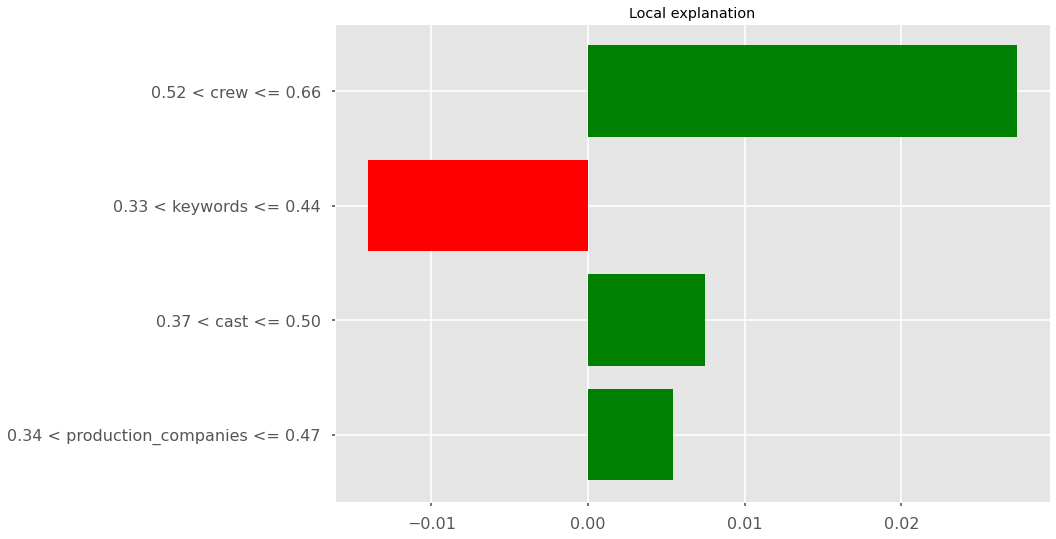

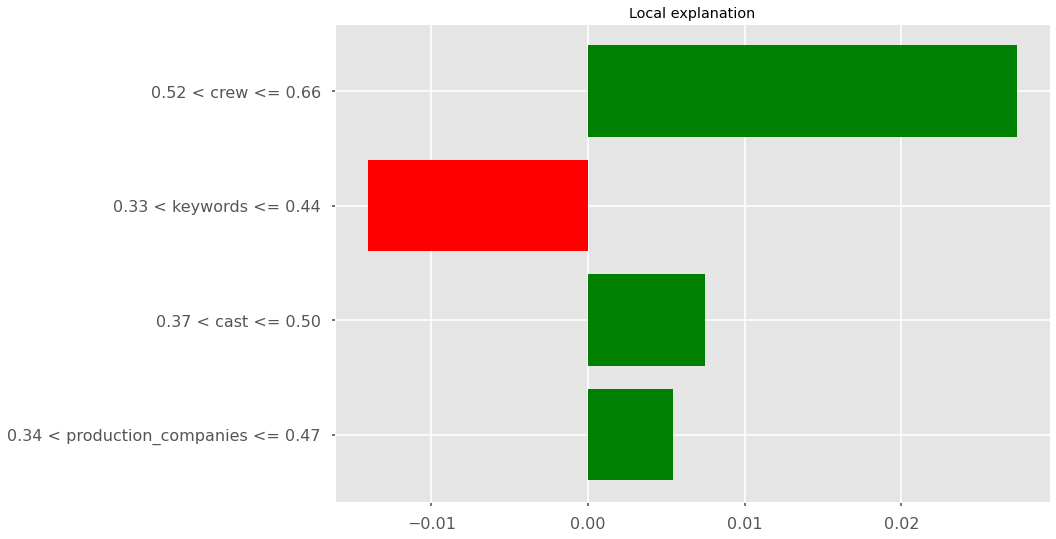

In [ ]:
exp = explainer.explain_instance(X_categ_test[0], categonly_model.predict)
exp.as_pyplot_figure()

In [ ]:
pd.DataFrame(exp.as_list())

0         1
0                  0.52 < crew <= 0.66  0.027395
1              0.33 < keywords <= 0.44 -0.014060
2                  0.37 < cast <= 0.50  0.007457
3  0.34 < production_companies <= 0.47  0.005409

In [ ]:
exp.show_in_notebook(show_table=True, show_all=True)

In [ ]:
print("[INFO] predicting avg votes...")
preds = categonly_model.predict([X_categ_val])


[INFO] predicting avg votes...


In [ ]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
print('mean_absolute_error = ',mean_absolute_error(val_labels, preds))
print('mean_squared_error  = ',mean_squared_error(val_labels, preds))
print('r2_score            = ',r2_score(val_labels, preds))	


mean_absolute_error =  0.028540500395646262
mean_squared_error  =  0.0015067703566132246
r2_score            =  0.8556502997897262


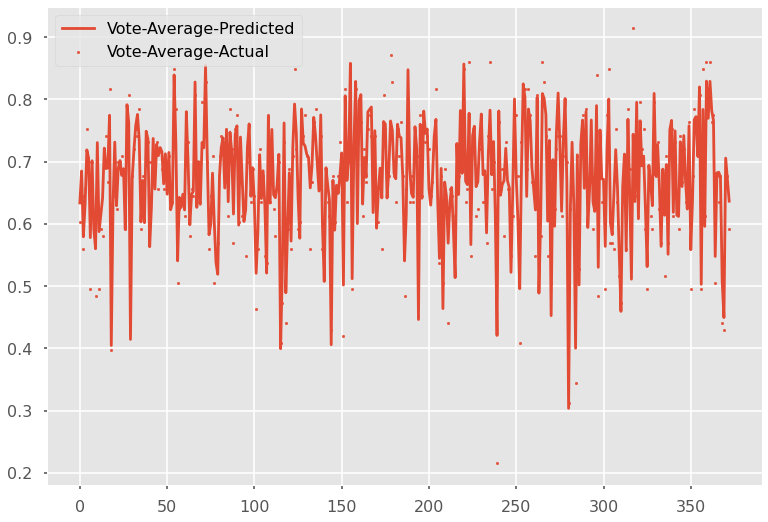

In [ ]:
import matplotlib.pyplot as plt
x_ax = range(len(X_img_val))
plt.scatter(x_ax, val_labels,  s=6, label="Vote-Average-Actual")
plt.plot(   x_ax, preds     ,       label="Vote-Average-Predicted")
plt.legend()
plt.show()

In [ ]:
categONLY_model

In [ ]:
def plot_loss(history):
  plt.title('Loss')
  plt.plot(history.history['loss'], label='train')
  plt.plot(history.history['val_loss'], label='test')
  plt.legend(['training loss', 'validation loss'], loc='upper right')
  plt.show()

def plot_mae(history):
  plt.title('MAE')
  plt.plot(history.history['mae'], label='train')
  plt.plot(history.history['val_mae'], label='test')
  plt.legend(['training mae', 'validation mae'], loc='lower right')
  plt.show()

def plot_mse(history):
  plt.title('MSE')
  plt.plot(history.history['mse'], label='train')
  plt.plot(history.history['val_mse'], label='test')
  plt.legend(['training mse', 'validation mse'], loc='lower right')
  plt.show()

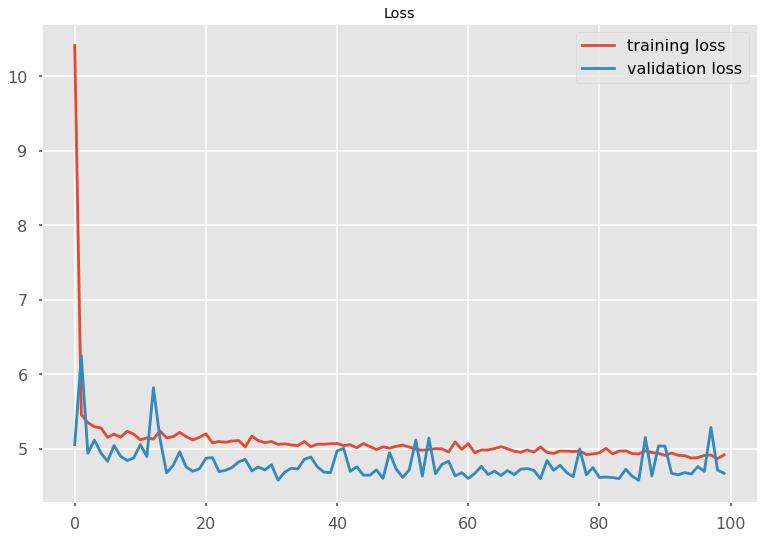

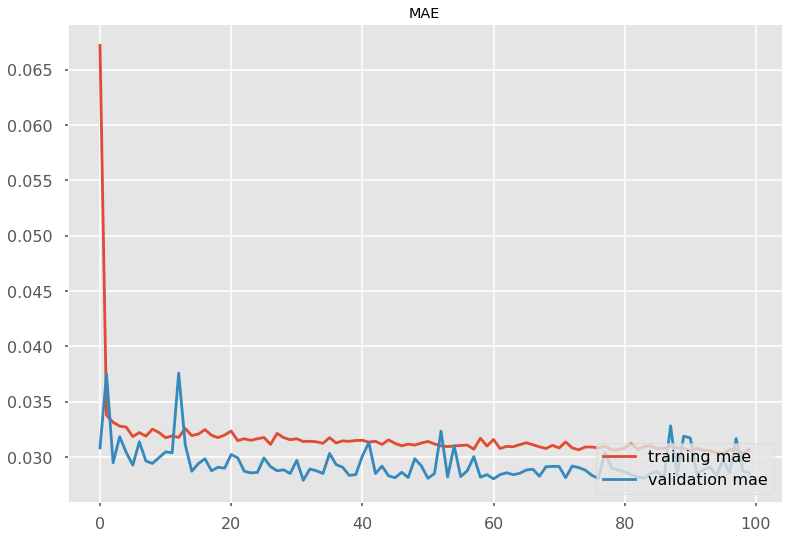

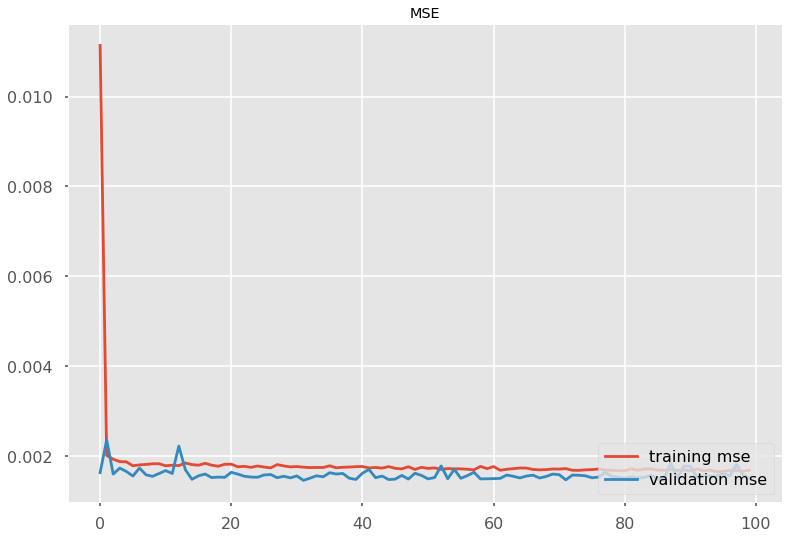

In [ ]:
plot_loss(categONLY_model)
plot_mae(categONLY_model)
plot_mse(categONLY_model)

In [ ]:
categonly_model.save('/content/drive/My Drive/MovieContent/OnlyCATEG_Aug03_2020.h5')

In [ ]:
from keras.models import Model, load_model
categonly_model = load_model("/content/drive/My Drive/MovieContent/OnlyCATEG_Aug03_2020.h5")